# Análisis de Series Temporales

In [5]:
import matplotlib
import statsmodels.api as sm
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


## Datos de ventas

In [6]:
df = pd.read_excel("Superstore2.xlsx")
furniture = df.loc[df['Category'] == 'Furniture']

# Rango

print(furniture['Order Date'].min(), furniture['Order Date'].max())

# Preprocesado
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
# furniture.isnull().sum()

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')


2014-01-01 00:00:00 2017-12-31 00:00:00


In [7]:
display(furniture)

Sales
Order Date           
2014-01-01   113.6700
2014-01-03  1960.8225
2014-01-04  1686.7000
2014-01-05    48.7800
2014-01-06   324.4500
...               ...
2017-12-27  2815.0026
2017-12-28   224.7000
2017-12-29  9109.4028
2017-12-30  9210.8869
2017-12-31  3995.2371

[1331 rows x 1 columns]

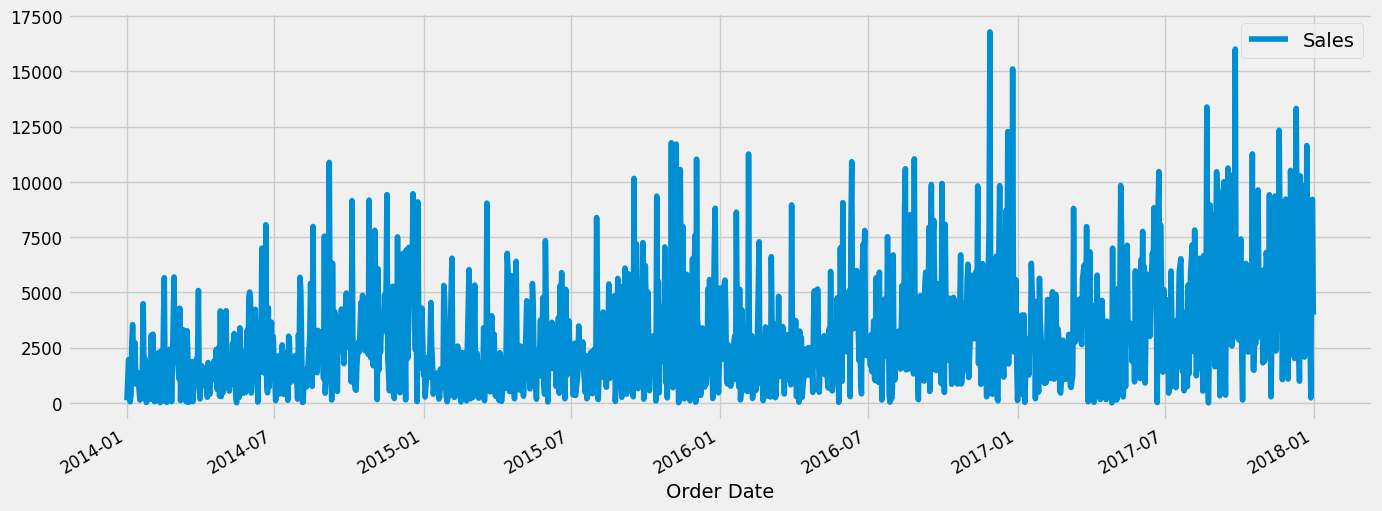

In [8]:
furniture.plot(figsize=(15, 6))
plt.show()

In [9]:
# Datos mensuales, fecha del último día del mes
y = furniture['Sales'].resample('M').mean()

In [10]:
display(y)

Order Date
2014-01-31    1325.528962
2014-02-28    1556.495109
2014-03-31    1678.219783
2014-04-30    1278.731046
2014-05-31    1777.452571
2014-06-30    2640.850083
2014-07-31    1364.476639
2014-08-31    2428.585846
2014-09-30    3354.774418
2014-10-31    3163.771044
2014-11-30    3448.512932
2014-12-31    4121.766997
2015-01-31    1474.527441
2015-02-28    1568.141392
2015-03-31    1967.226096
2015-04-30    2103.918158
2015-05-31    2331.075115
2015-06-30    2716.024737
2015-07-31    1536.718185
2015-08-31    2918.773897
2015-09-30    3434.485043
2015-10-31    2924.962890
2015-11-30    4009.302983
2015-12-31    3227.224647
2016-01-31    2820.848300
2016-02-29    2273.767088
2016-03-31    2332.974743
2016-04-30    2021.740085
2016-05-31    2656.101750
2016-06-30    4116.090768
2016-07-31    2477.720659
2016-08-31    4010.569750
2016-09-30    4403.471910
2016-10-31    3189.948518
2016-11-30    4385.811496
2016-12-31    4938.036307
2017-01-31    2492.838239
2017-02-28    2508.818696
2

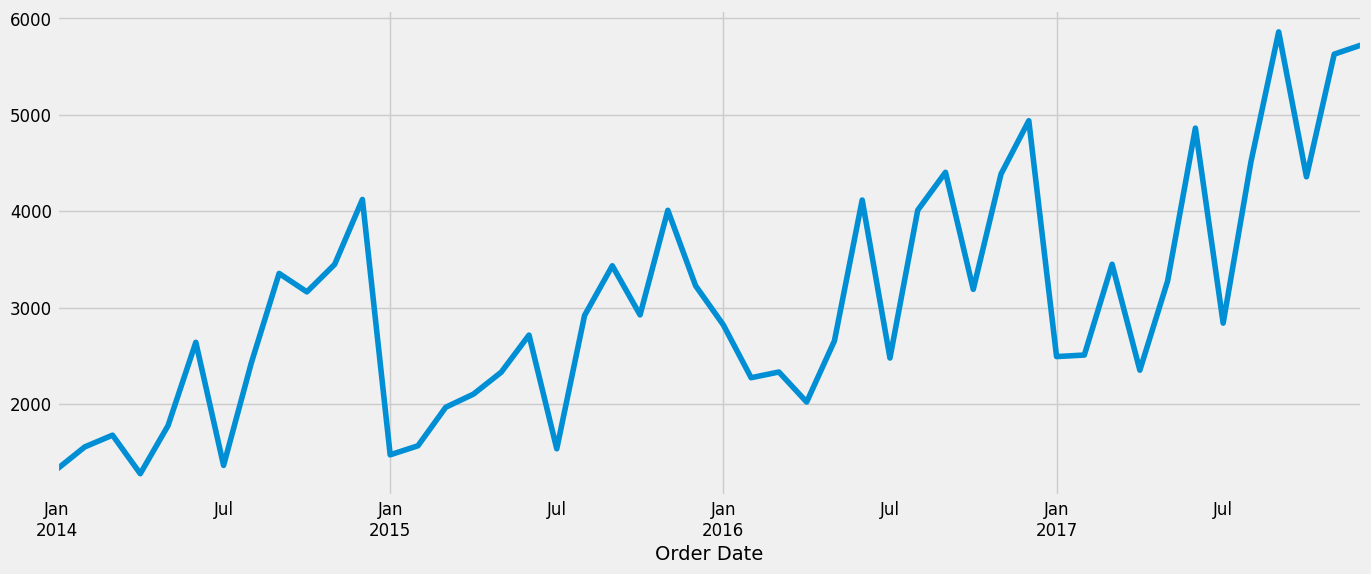

In [11]:
y.plot(figsize=(15, 6))
plt.show()


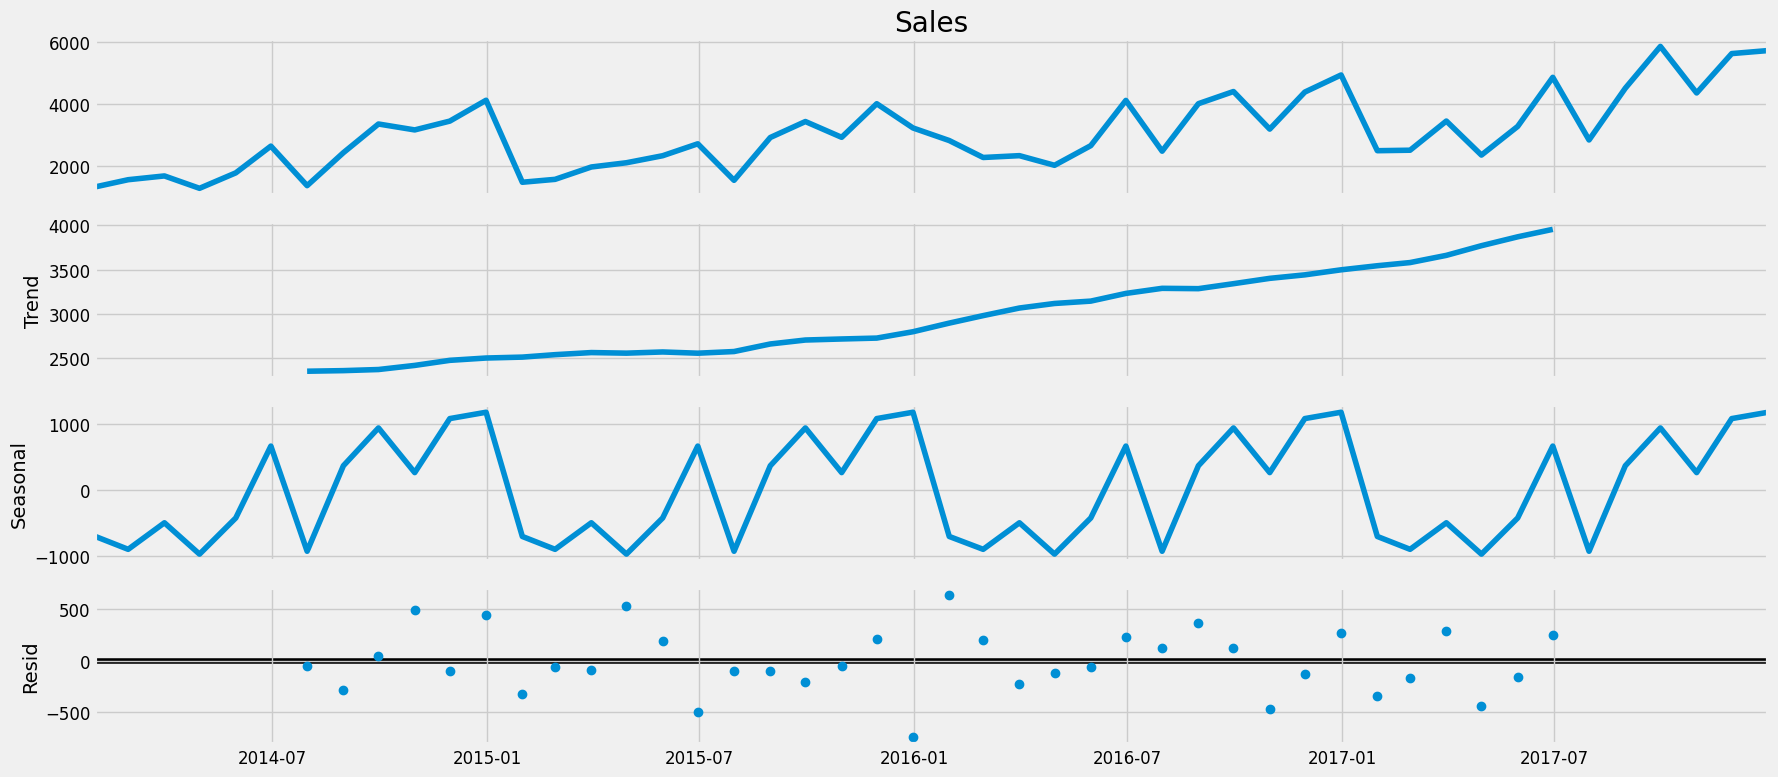

In [12]:
# Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Modelos ARIMA

In [13]:
# ------------------------------------
# Predicción ARIMA
# ------------------------------------

y_train = y[:'2016-12-31']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Ajuste de hiperparámetros
mejor = np.inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < mejor:
                mejor = results.aic
                mejores_parametros = [param, param_seasonal]
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:678.1139555172753
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:661.2441800887304
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:387.3682540710637
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:389.34177708057996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:615.316871108745
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:617.1869661484633
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:389.3117519066839
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:387.52932650468256
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:646.4303911547535
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:633.7632104213525
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:386.560329697435
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:388.4825880304225
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:606.9719403327008
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:610.5753349197942
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93052D+00    |proj g|=  3.61370D-02

At iterate    5    f=  4.92649D+00    |proj g|=  6.23548D-03

At iterate   10    f=  4.89525D+00    |proj g|=  1.51822D-01

At iterate   15    f=  4.83390D+00    |proj g|=  6.48380D-02

At iterate   20    f=  4.82947D+00    |proj g|=  1.13236D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   2.498D-07   4.829D+00
  F =   4.8294720103051985     

CONVERG

 This problem is unconstrained.


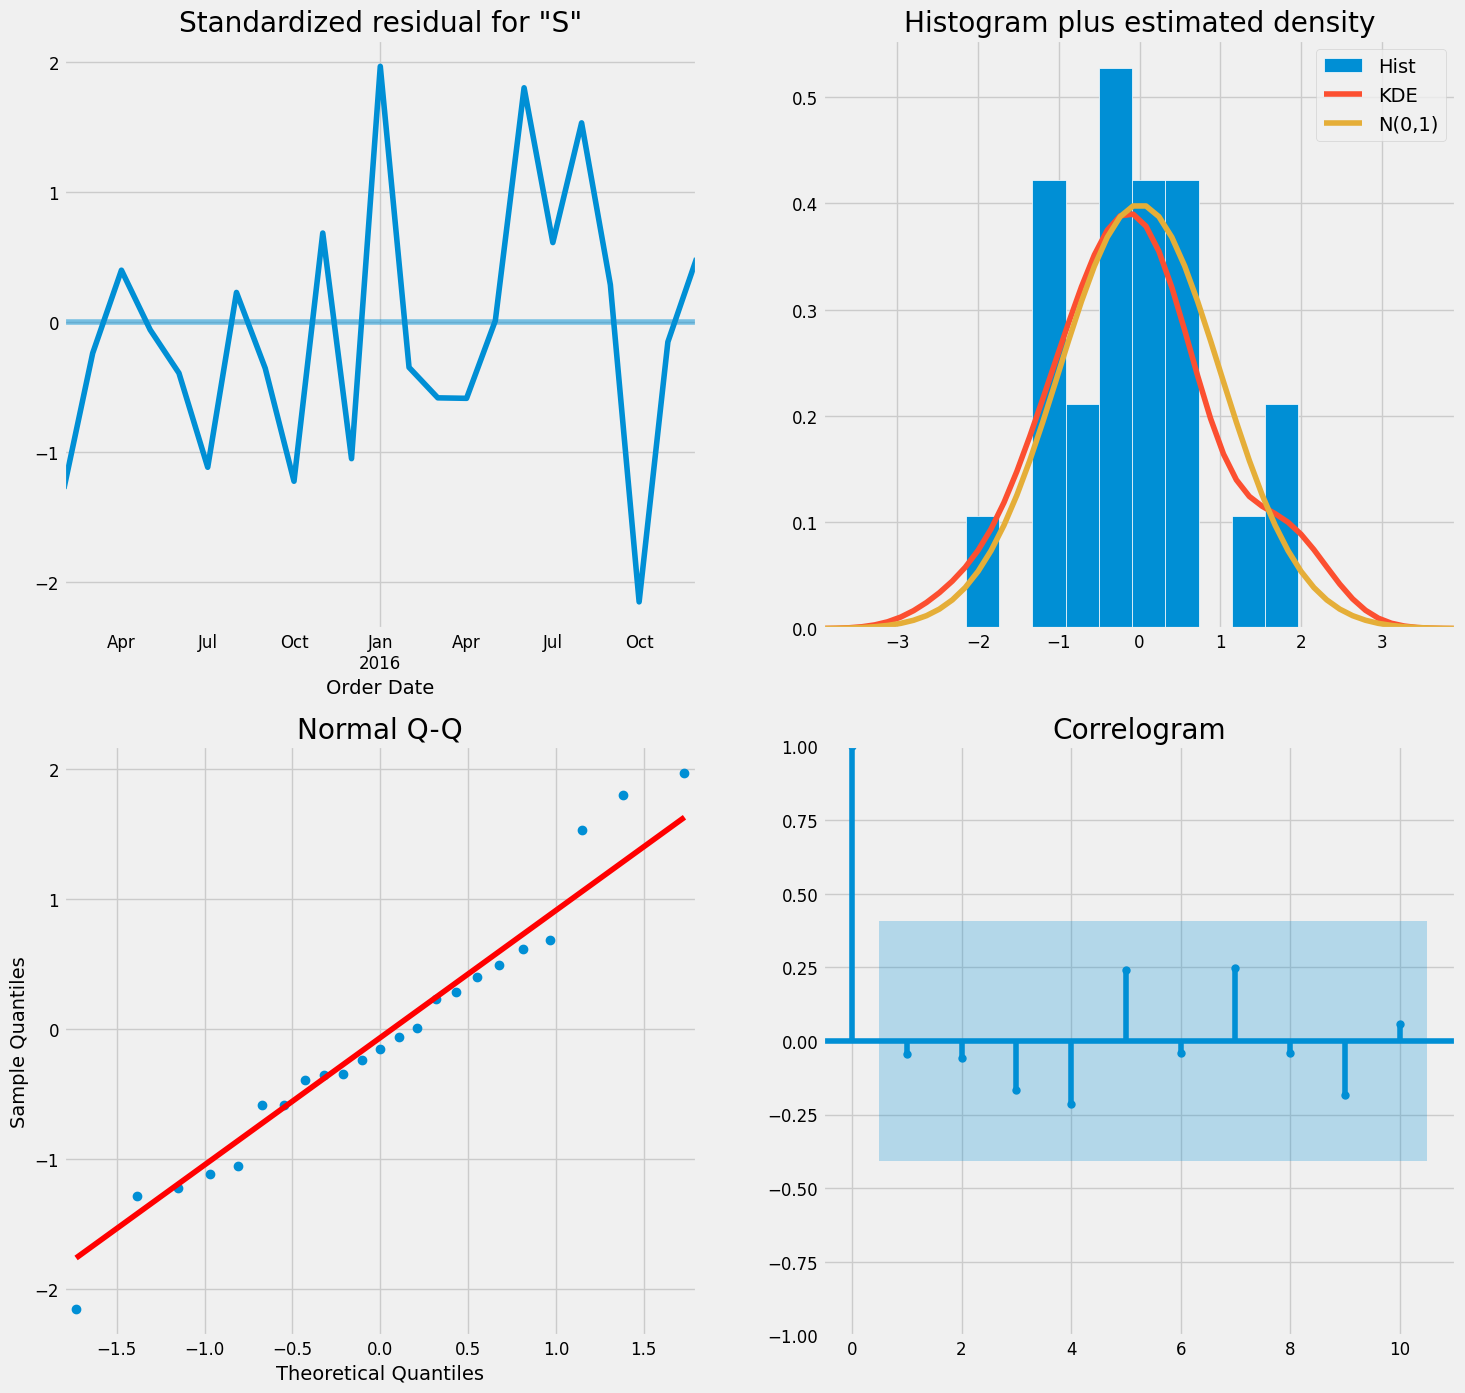

In [14]:
# Ajuste del modelo
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=mejores_parametros[0],
                                seasonal_order=mejores_parametros[1],
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 16))
plt.show()


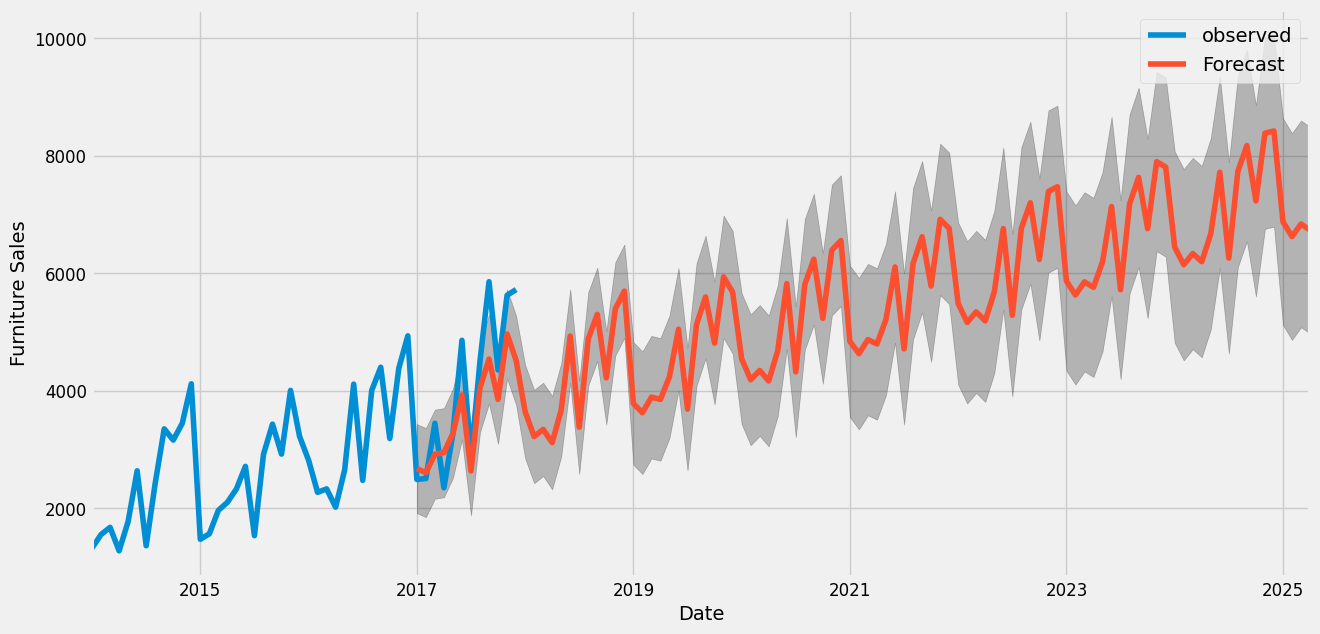

In [15]:
# Predicción a múltiples pasos
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [16]:

# Evaluación de la predicción ARIMA
y_truth = y['2017-01-31':]
predicciones_arima = pred_uc.predicted_mean[y_truth.index]

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean()
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round(rele, 2)))


Error cuadrático medio ARIMA 470959.3
Raíz cuadrada de ECM ARIMA 686.26
Error porcentual medio ARIMA 12.92


## Series multivaluadas

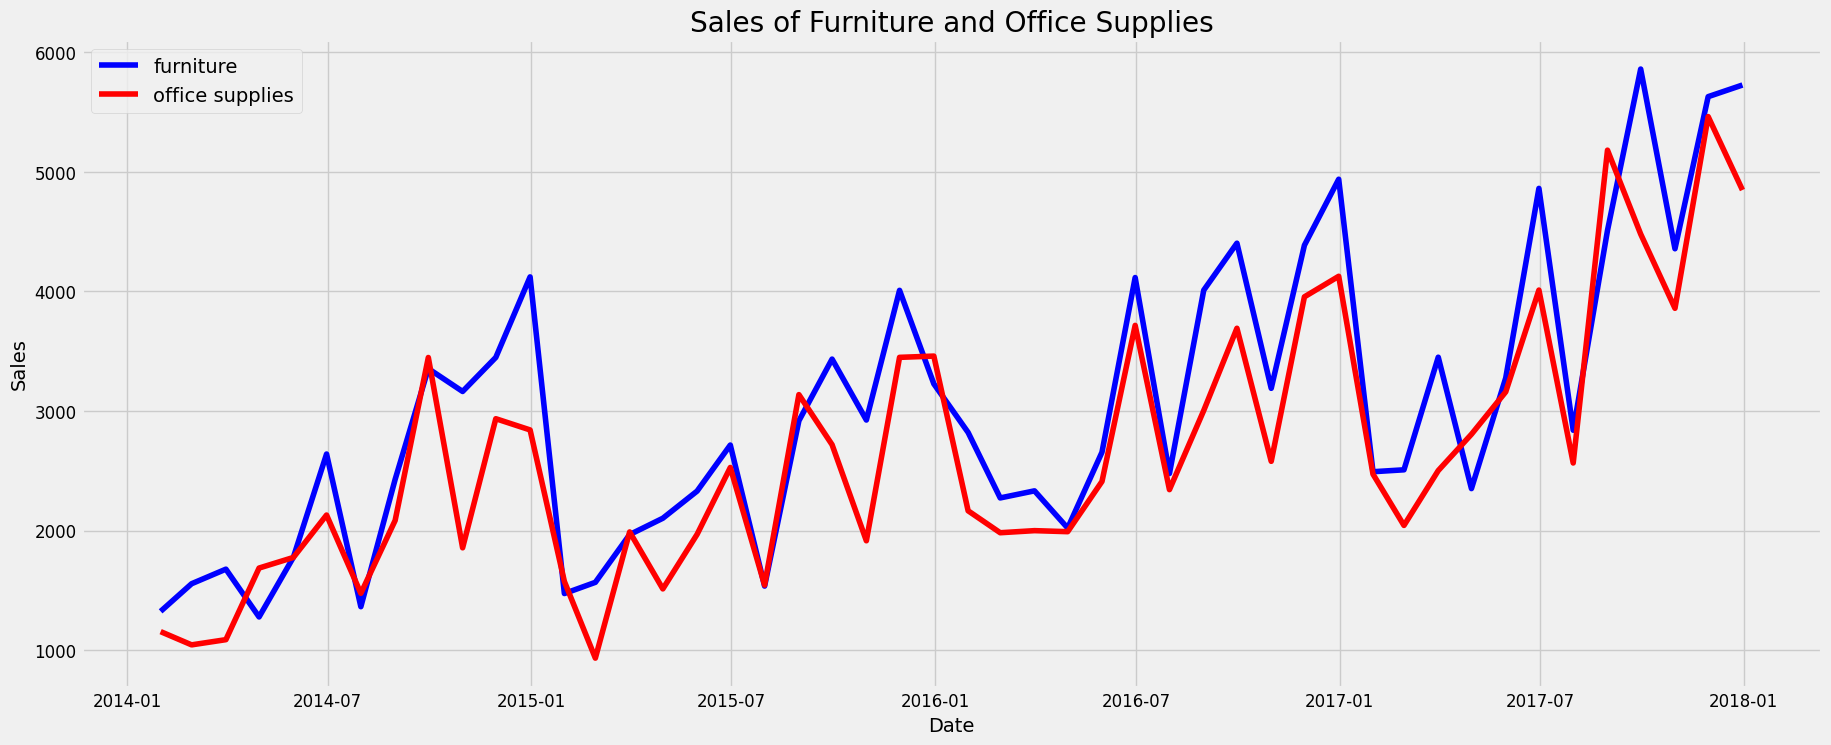

In [17]:

# Segunda categoría de productos
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']


# Combinación de ambos productos en el mismo dataframe con ventas mensuales
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('M').mean()
y_office = office['Sales'].resample('M').mean()
furniture = pd.DataFrame(
    {'Order Date': y_furniture.index, 'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales',
             'Sales_y': 'office_sales'}, inplace=True)
store.head()

plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'],
         'b-', label='furniture')
plt.plot(store['Order Date'], store['office_sales'],
         'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()
plt.show()


## Holt-Winters

Error cuadrático medio HW 308855.63
Raíz cuadrada de ECM HW 555.75
Error porcentual medio HW 11.27


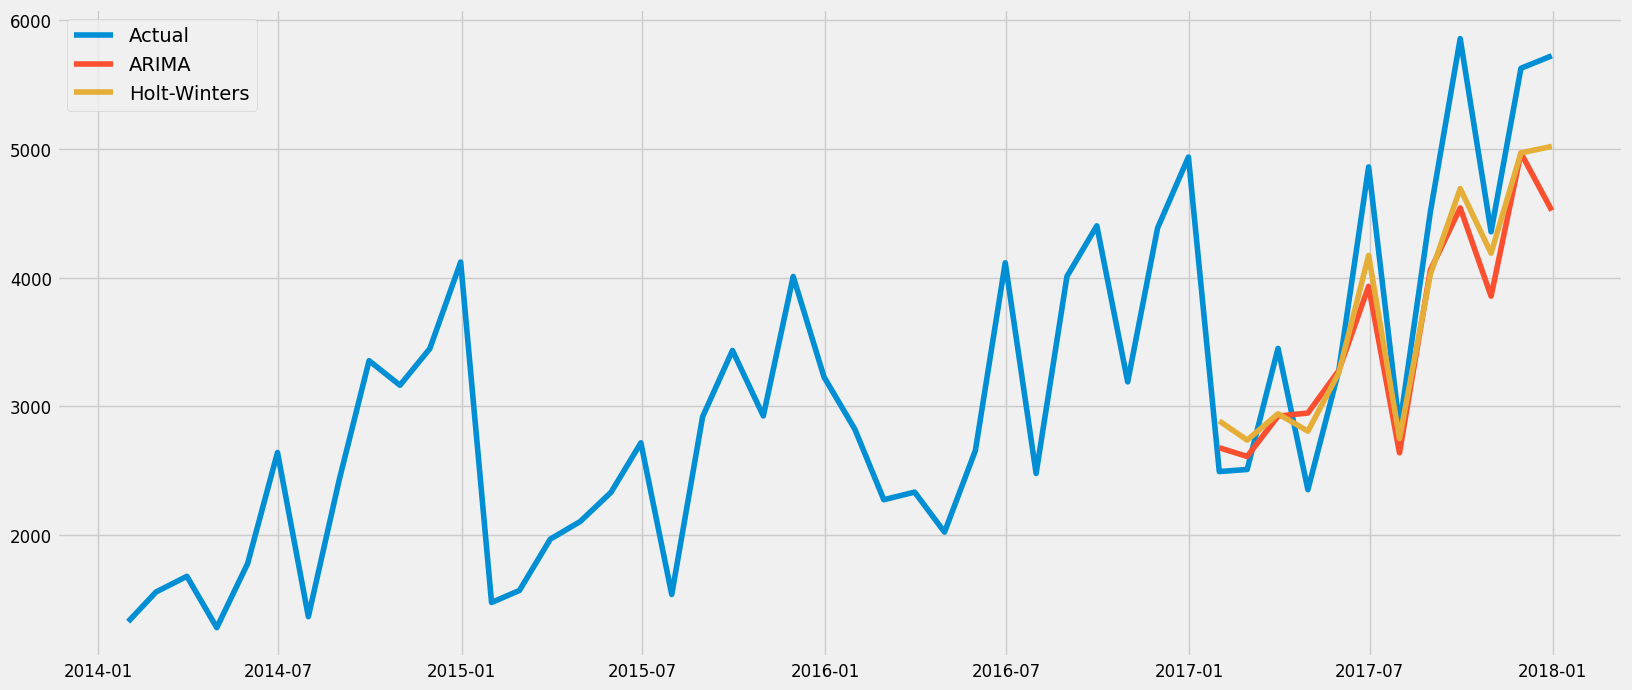

In [18]:

# ------------------------------------
# Holt-Winters
# ------------------------------------
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.api import ExponentialSmoothing
hw_model = ExponentialSmoothing(
    y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
predicciones_hw = hw_model.forecast(12)

mse = ((predicciones_hw - y_truth) ** 2).mean()
rele = (np.abs(predicciones_hw - y_truth)/y_truth*100).mean()
print('Error cuadrático medio HW {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM HW {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio HW {}'.format(round(rele, 2)))

plt.plot(furniture.set_index("Order Date"), label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.legend()
plt.show()


## Prophet - ejemplo sencillo

In [19]:
# ------------------------------------
# Prophet
# ------------------------------------


import pandas as pd
from datetime import datetime
datelist = pd.date_range(datetime.today(), periods=100).tolist()
valores = np.arange(100)+np.random.normal(loc=0, scale=10, size=100)+15*np.sin(2*np.pi*np.arange(100)/7)

ejemplo = pd.DataFrame(
    {"ds": datelist, "y": valores}
)

display(ejemplo)


ds           y
0  2024-01-04 19:39:40.680636   -6.226692
1  2024-01-05 19:39:40.680636   22.510348
2  2024-01-06 19:39:40.680636   22.683264
3  2024-01-07 19:39:40.680636   20.632986
4  2024-01-08 19:39:40.680636   -9.575423
..                        ...         ...
95 2024-04-08 19:39:40.680636   86.174783
96 2024-04-09 19:39:40.680636   80.247378
97 2024-04-10 19:39:40.680636   89.809262
98 2024-04-11 19:39:40.680636   92.310216
99 2024-04-12 19:39:40.680636  109.494591

[100 rows x 2 columns]

<Axes: xlabel='ds'>

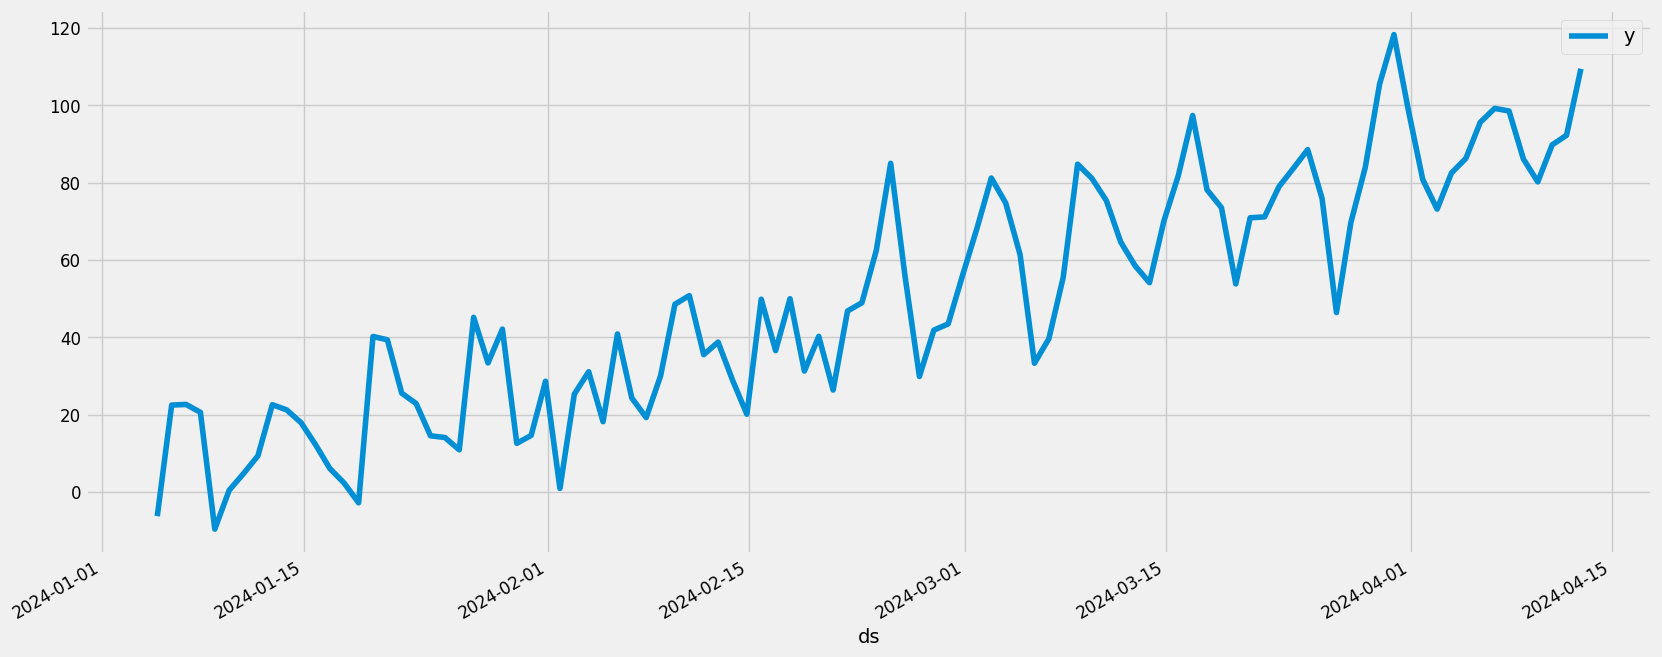

In [20]:
ejemplo.plot(x="ds",y="y")

In [21]:
from prophet import Prophet
m = Prophet(interval_width=0.9)
m.fit(ejemplo)

19:39:40 - cmdstanpy - INFO - Chain [1] start processing
19:39:40 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=100)
future.tail()


ds
195 2024-07-17 19:39:40.680636
196 2024-07-18 19:39:40.680636
197 2024-07-19 19:39:40.680636
198 2024-07-20 19:39:40.680636
199 2024-07-21 19:39:40.680636

In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
195 2024-07-17 19:39:40.680636  179.945508  166.503541  194.208637
196 2024-07-18 19:39:40.680636  185.188434  170.829505  198.710567
197 2024-07-19 19:39:40.680636  203.280656  188.851778  217.890326
198 2024-07-20 19:39:40.680636  208.693908  194.712646  222.611769
199 2024-07-21 19:39:40.680636  199.175884  183.573239  213.617481

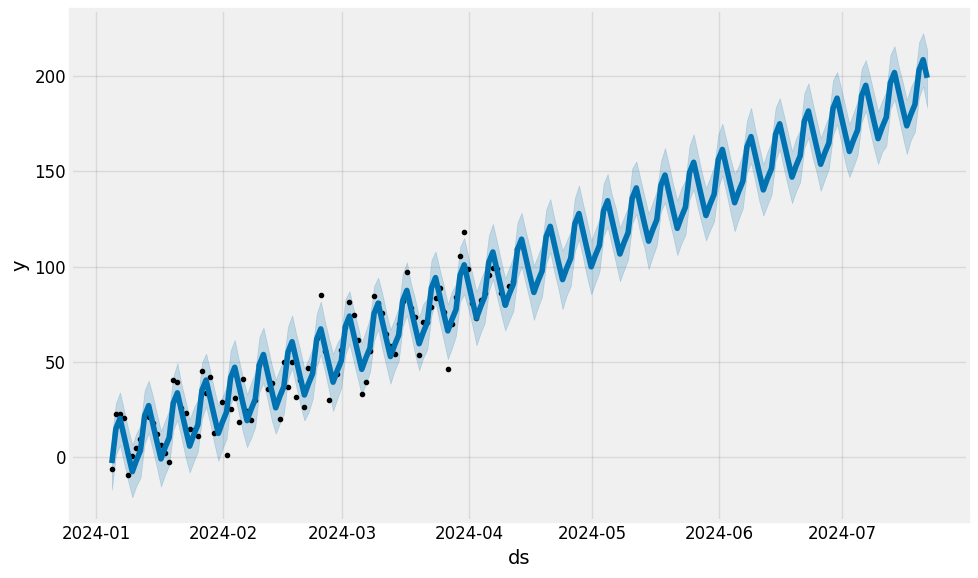

In [24]:
fig1 = m.plot(forecast)

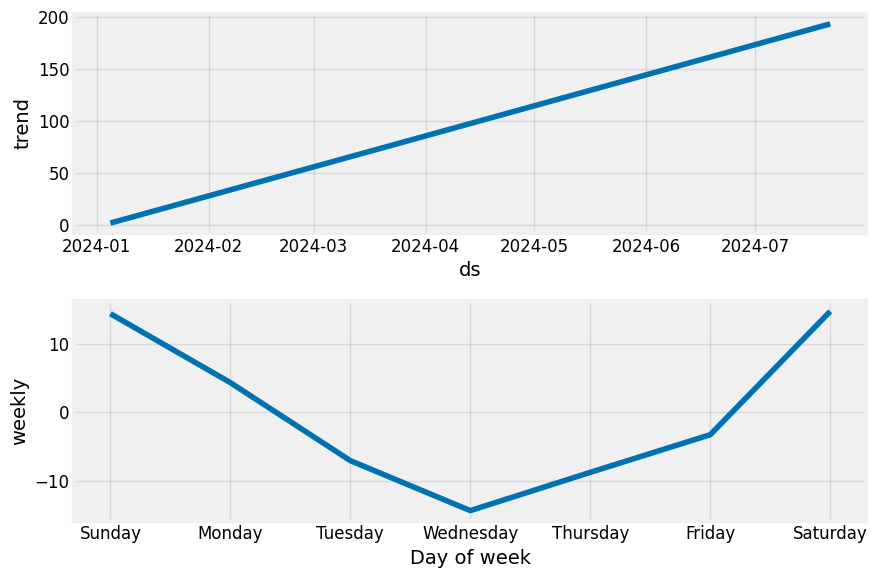

In [25]:
fig2 = fig2 = m.plot_components(forecast)

In [26]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [27]:
plot_components_plotly(m, forecast)

## Prophet - ventas

19:39:41 - cmdstanpy - INFO - Chain [1] start processing
19:39:41 - cmdstanpy - INFO - Chain [1] done processing
19:39:41 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

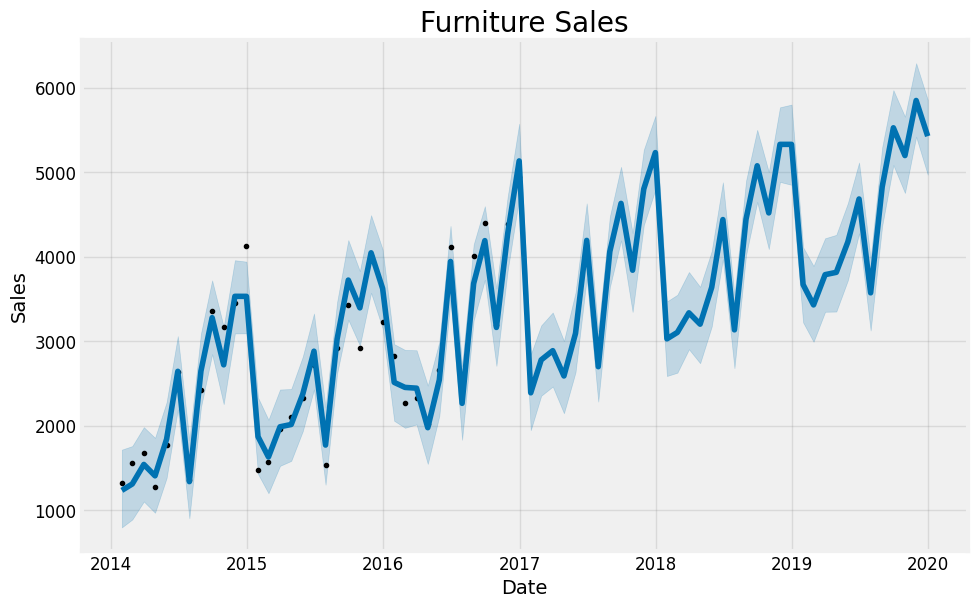

<Figure size 1800x600 with 0 Axes>

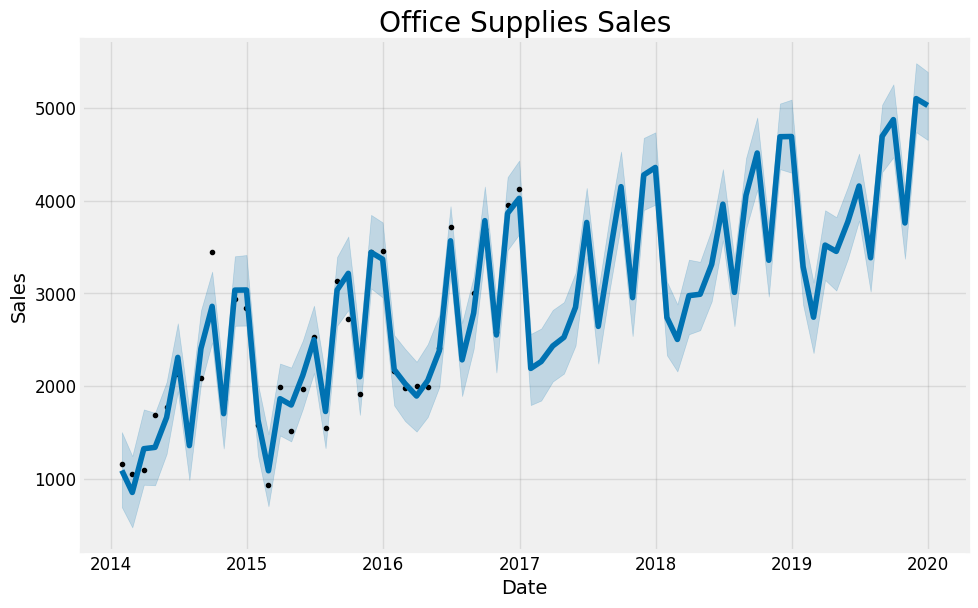

Date  furniture_trend  furniture_yhat_lower  furniture_yhat_upper  \
0 2014-01-31      2140.569607            798.463400           1717.895976   
1 2014-02-28      2174.651738            891.701809           1760.194443   
2 2014-03-31      2212.385527           1104.426448           1984.124525   
3 2014-04-30      2248.902097            971.370890           1857.363898   
4 2014-05-31      2286.635885           1383.151665           2279.587727   

   furniture_trend_lower  furniture_trend_upper  furniture_additive_terms  \
0            2140.569607            2140.569607               -904.549681   
1            2174.651738            2174.651738               -862.871470   
2            2212.385527            2212.385527               -669.510607   
3            2248.902097            2248.902097               -840.695832   
4            2286.635885            2286.635885               -444.067761   

   furniture_additive_terms_lower  furniture_additive_terms_upper  \
0                     -904.549681                     -904.549681   
1                     -862.871470                     -862.871470   
2                     -669.510607                     -669.510607   
3                     -840.695832                     -840.695832   
4                     -444.067761                     -444.067761   

   furniture_yearly  ...  office_additive_terms  office_additive_terms_lower  \
0       -904.549681  ...            -791.320632                  -791.320632   
1       -862.871470  ...           -1059.697425                 -1059.697425   
2       -669.510607  ...            -622.529104                  -622.529104   
3       -840.695832  ...            -641.551983                  -641.551983   
4       -444.067761  ...            -353.445783                  -353.445783   

   office_additive_terms_upper  office_yearly  office_yearly_lower  \
0                  -791.320632    -791.320632          -791.320632   
1                 -1059.697425   -1059.697425         -1059.697425   
2                  -622.529104    -622.529104          -622.529104   
3                  -641.551983    -641.551983          -641.551983   
4                  -353.445783    -353.445783          -353.445783   

   office_yearly_upper  office_multiplicative_terms  \
0          -791.320632                          0.0   
1         -1059.697425                          0.0   
2          -622.529104                          0.0   
3          -641.551983                          0.0   
4          -353.445783                          0.0   

   office_multiplicative_terms_lower  office_multiplicative_terms_upper  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   office_yhat  
0  1088.534383  
1   851.484946  
2  1323.337126  
3  1337.879271  
4  1660.669330  

[5 rows x 31 columns]

In [28]:

# Dataframes para Prophet (columnas ds / y)

furniture = df.loc[df['Category'] == 'Furniture']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture = furniture['Sales'].resample('M').mean()
furniture_train = furniture[:'2016-12-31'].to_frame()
furniture_train.index.name = "ds"
furniture_train = furniture_train.rename(columns={'Sales': 'y'})
furniture_train.reset_index(inplace=True)

office = df.loc[df['Category'] == 'Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office.drop(cols, axis=1, inplace=True)
office = office.sort_values('Order Date')
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office = office['Sales'].resample('M').mean()
office_train = office[:'2016-12-31'].to_frame()
office_train.index.name = "ds"
office_train = office_train.rename(columns={'Sales': 'y'})
office_train.reset_index(inplace=True)

furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture_train)

office_model = Prophet(interval_width=0.95)
office_model.fit(office_train)

furniture_forecast = furniture_model.make_future_dataframe(
    periods=36, freq='M')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='M')
office_forecast = office_model.predict(office_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')
plt.show()

plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel='Date', ylabel='Sales')
plt.title('Office Supplies Sales')
plt.show()

# Comparación de predicciones
furniture_names = ['furniture_%s' %
                   column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast,
                    how='inner', left_on='furniture_ds', right_on='office_ds')
forecast = forecast.rename(
    columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


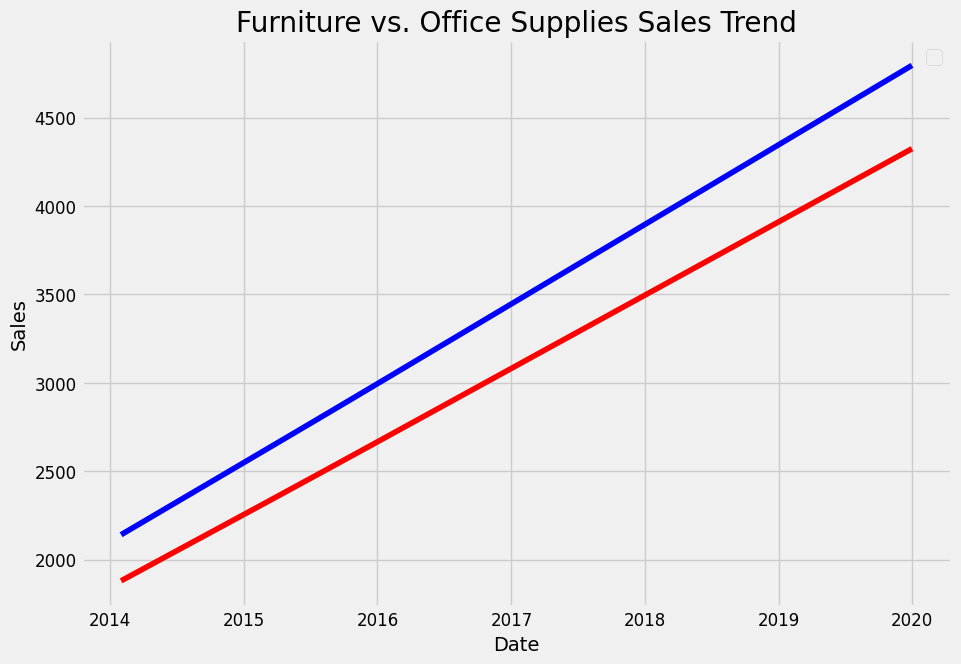

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


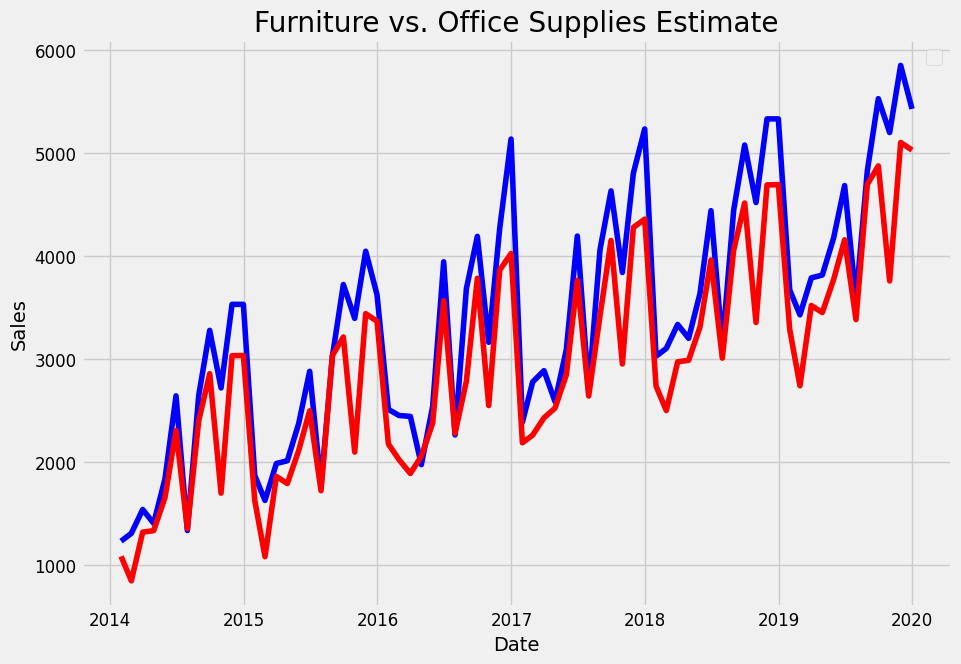

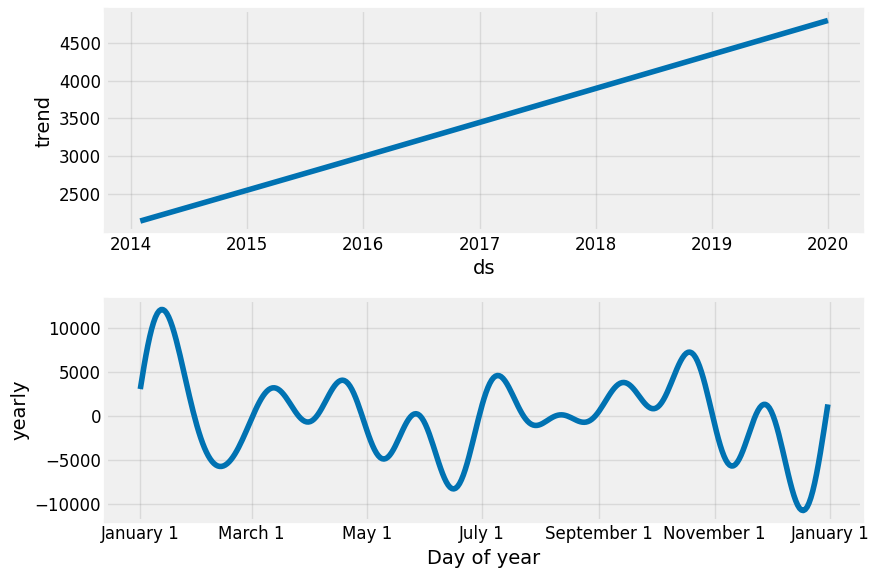

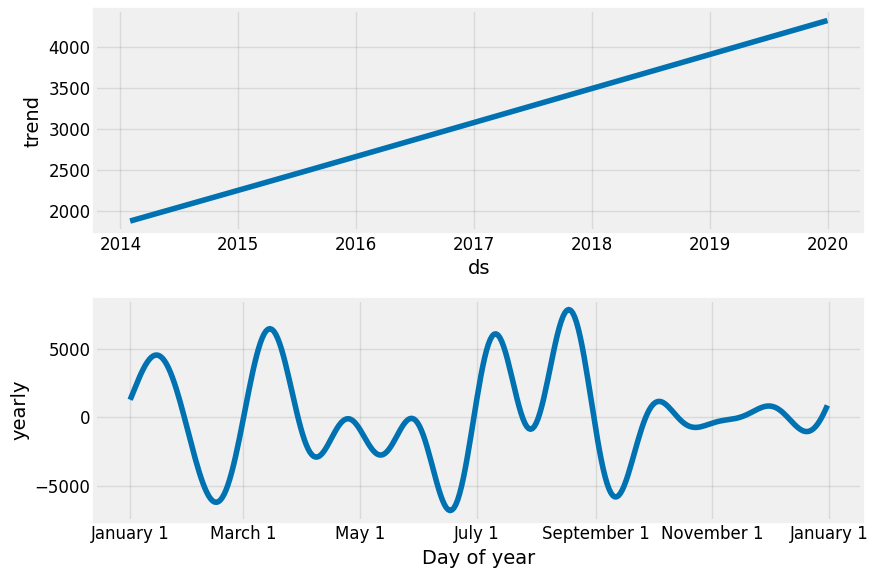

In [29]:
# Tendencias
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate')
plt.show()

furniture_model.plot_components(furniture_forecast)
plt.show()

office_model.plot_components(office_forecast)
plt.show()
plt.close()


Error cuadrático medio ARIMA 470959.3
Raíz cuadrada de ECM ARIMA 686.26
Error porcentual medio ARIMA 12.92
Error cuadrático medio PROPHET 321098.82
Raíz cuadrada de ECM PROPHET 566.66
Error porcentual medio PROPHET 10.97


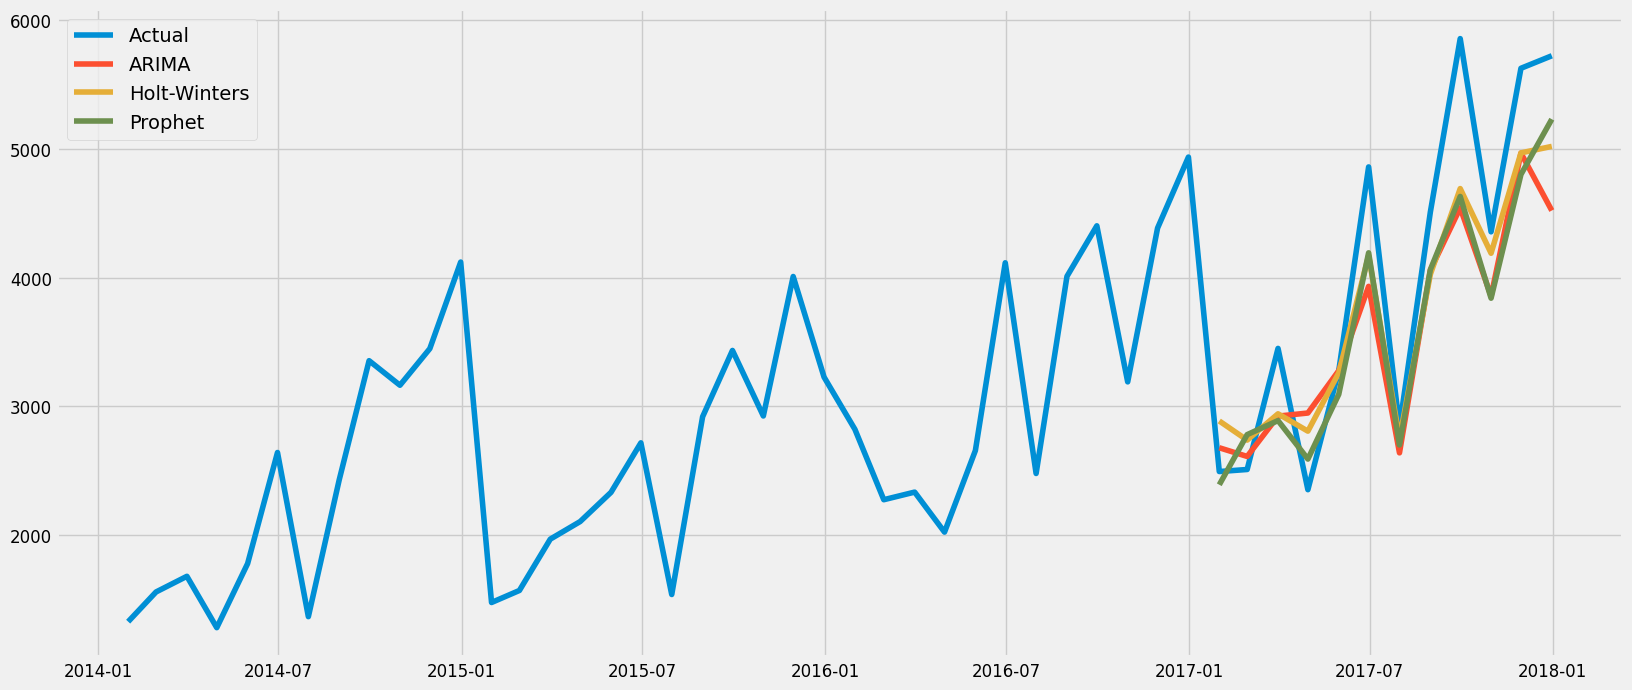

In [30]:

# ------------------------------------
# COMPARATIVA PREDICCION ARIMA-PROPHET
# ------------------------------------

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean()
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round((rele), 2)))

furniture_forecast.set_index("ds", inplace=True)
predicciones_prophet = furniture_forecast.loc[y_truth.index, "yhat"]
mse = ((predicciones_prophet - y_truth) ** 2).mean()
rele = (np.abs(predicciones_prophet - y_truth)/y_truth*100).mean()
print('Error cuadrático medio PROPHET {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM PROPHET {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio PROPHET {}'.format(round((rele), 2)))

plt.plot(furniture, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.legend()
plt.show()


## Prophet - variables exógenas

In [31]:
datelist = pd.date_range(datetime.today(), periods=100).tolist()
valores = np.arange(100)+np.random.normal(loc=0, scale=10, size=100)+15*np.sin(2*np.pi*np.arange(100)/7)+25*np.cos(2*np.pi*np.arange(100)/14)

ejemplo = pd.DataFrame(
    {"ds": datelist, "y": valores}
)

display(ejemplo)

ds           y
0  2024-01-04 19:39:43.492547   26.391366
1  2024-01-05 19:39:43.492547   37.078547
2  2024-01-06 19:39:43.492547   28.319734
3  2024-01-07 19:39:43.492547   17.287129
4  2024-01-08 19:39:43.492547  -13.474389
..                        ...         ...
95 2024-04-08 19:39:43.492547  100.812592
96 2024-04-09 19:39:43.492547   87.215485
97 2024-04-10 19:39:43.492547   90.336201
98 2024-04-11 19:39:43.492547  128.615555
99 2024-04-12 19:39:43.492547  130.946719

[100 rows x 2 columns]

In [32]:
combinado = Prophet(interval_width=0.95)
combinado.fit(ejemplo)
forecast = combinado.make_future_dataframe(periods=36, freq='M')
forecast = combinado.predict(ejemplo)
plot_plotly(combinado, forecast)

19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
plot_components_plotly(combinado, forecast)


In [34]:
ejemplo["entrada"] = np.cos(2*np.pi*np.arange(100)/14)
display(ejemplo)

ds           y   entrada
0  2024-01-04 19:39:43.492547   26.391366  1.000000
1  2024-01-05 19:39:43.492547   37.078547  0.900969
2  2024-01-06 19:39:43.492547   28.319734  0.623490
3  2024-01-07 19:39:43.492547   17.287129  0.222521
4  2024-01-08 19:39:43.492547  -13.474389 -0.222521
..                        ...         ...       ...
95 2024-04-08 19:39:43.492547  100.812592  0.222521
96 2024-04-09 19:39:43.492547   87.215485  0.623490
97 2024-04-10 19:39:43.492547   90.336201  0.900969
98 2024-04-11 19:39:43.492547  128.615555  1.000000
99 2024-04-12 19:39:43.492547  130.946719  0.900969

[100 rows x 3 columns]

In [35]:
combinado = Prophet(interval_width=0.95)
combinado.add_regressor("entrada", standardize=False)
combinado.fit(ejemplo)
forecast = combinado.make_future_dataframe(periods=36, freq='M')
forecast = combinado.predict(ejemplo)
plot_plotly(combinado, forecast)

19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
plot_components_plotly(combinado, forecast)

# Prophet - Ventas + variables exógenas

19:39:44 - cmdstanpy - INFO - Chain [1] start processing
19:39:44 - cmdstanpy - INFO - Chain [1] done processing


Error cuadrático medio PROPHET múltiple 307991.31
Raíz cuadrada de ECM PROPHET múltiple 554.97
Error porcentual medio PROPHET múltiple 10.75


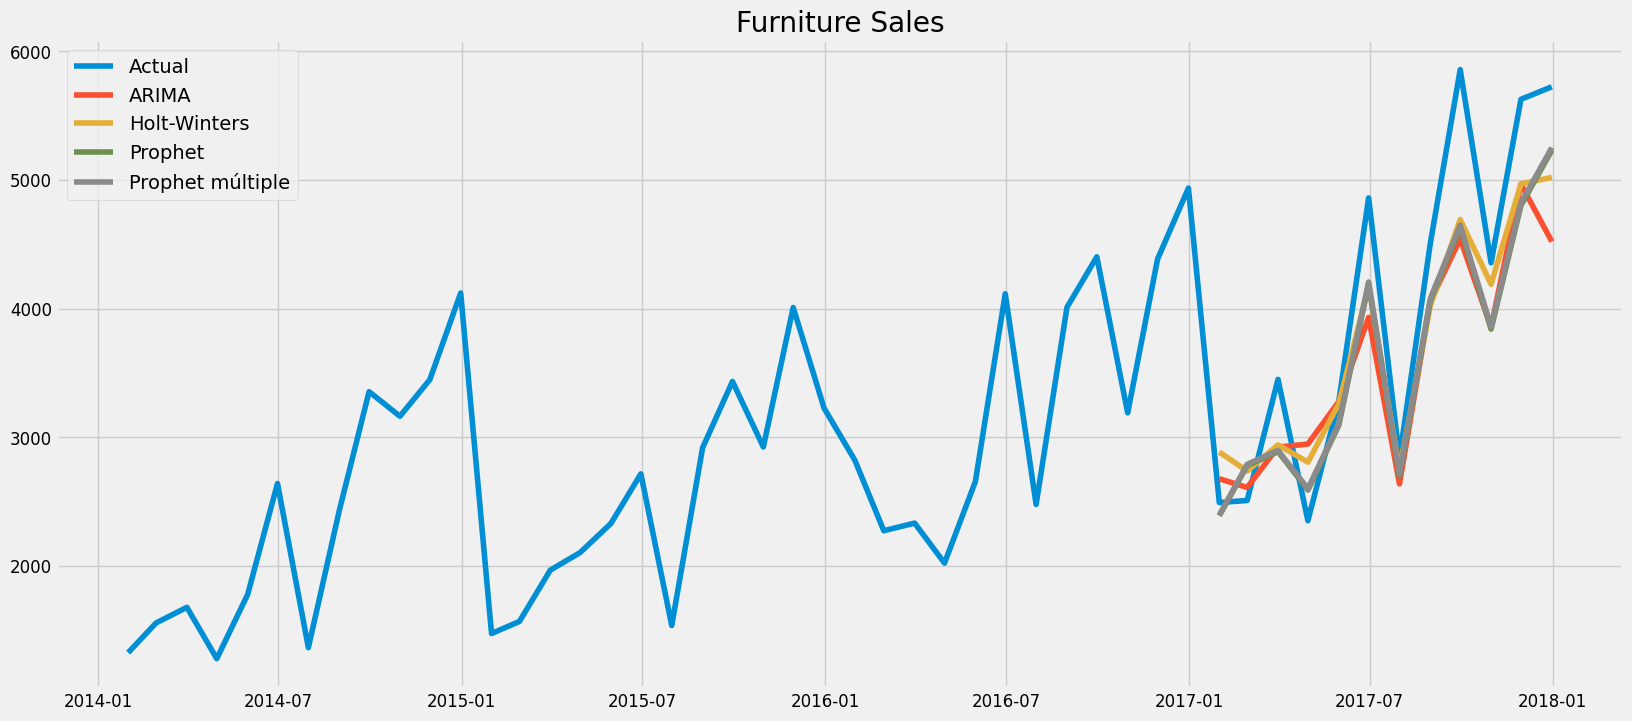

In [37]:

# ------------------------------------
# PROPHET múltiple
# ------------------------------------


# modelo combinado:
# Añadimos como entrada la predicción de los precios de los productos de oficina
combinado_train = furniture_train.copy()
combinado_train["office"] = office_model.predict(office_train)["yhat"]

combinado_model = Prophet(interval_width=0.95)
combinado_model.add_regressor("office", standardize=False)
combinado_model.fit(combinado_train)
combinado_forecast = combinado_model.make_future_dataframe(
    periods=36, freq='M')
combinado_forecast["office"] = office_forecast["yhat"]
combinado_forecast = combinado_model.predict(combinado_forecast)
combinado_forecast.set_index("ds", inplace=True)

predicciones_prophet2 = combinado_forecast.loc[y_truth.index, "yhat"]
mse = ((predicciones_prophet2 - y_truth) ** 2).mean()
rele = (np.abs(predicciones_prophet2 - y_truth)/y_truth*100).mean()
print('Error cuadrático medio PROPHET múltiple {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM PROPHET múltiple {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio PROPHET múltiple {}'.format(round((rele), 2)))

plt.plot(furniture, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.legend()
plt.title('Furniture Sales')
plt.show()


In [38]:
# ! pip install --upgrade "gluonts[torch]"

# DeepAR

In [39]:
# %pip install torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
import torch


## Ejemplo sencillo

variable
fecha                                 
2024-01-04 19:39:45.914203    1.936888
2024-01-05 19:39:45.914203    8.814044
2024-01-06 19:39:45.914203   36.709572
2024-01-07 19:39:45.914203   -3.006491
2024-01-08 19:39:45.914203   -3.800881
...                                ...
2024-04-08 19:39:45.914203   65.937423
2024-04-09 19:39:45.914203   60.787673
2024-04-10 19:39:45.914203   76.941772
2024-04-11 19:39:45.914203   84.717660
2024-04-12 19:39:45.914203  125.009821

[100 rows x 1 columns]

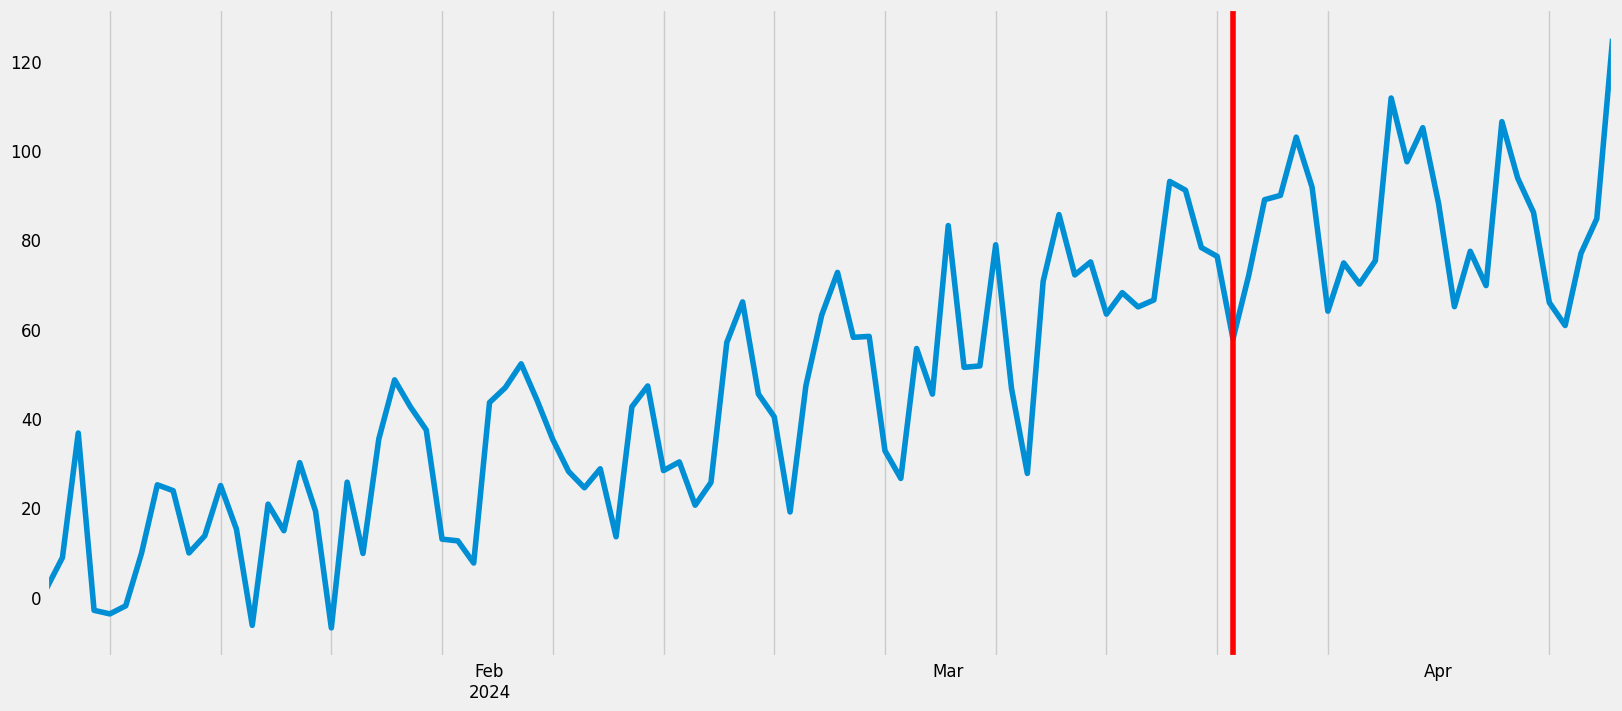

In [40]:
# -----------------------------------------------------------------------------
# DeepAR
# -----------------------------------------------------------------------------


datelist = pd.date_range(datetime.today(), periods=100).tolist()
valores = np.arange(100)+np.random.normal(loc=0, scale=10, size=100)+15*np.sin(2*np.pi*np.arange(100)/7)

ejemplo = pd.DataFrame(
    {"fecha": datelist, "variable": valores}
)
ejemplo.set_index("fecha",inplace=True)

display(ejemplo)

endTrain = ejemplo.index[75]

# Una variable "target", una fecha "start" y una frecuencia
training_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:endTrain,"variable"], }],
    freq="D"
)
# Train + test
test_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:,"variable"], }],
    freq="D"
)

to_pandas(test_data[0]).plot()
plt.axvline(endTrain, color='r')
plt.grid(which="both")
plt.show()


In [41]:
estimator = DeepAREstimator(freq="D",
                            prediction_length=12*3,
                            trainer_kwargs={"max_epochs": 100, "accelerator": "cpu"})

predictor = estimator.train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | [[1, 1], [1, 1], [1, 1128, 4], [1, 1128], [1, 1128], [1, 36, 4]] | [1, 100, 36]
------------------------------------------------------------------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 3.80046 (best 3.80046), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_32/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 3.31171 (best 3.31171), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_32/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 3.01932 (best 3.01932), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_32/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 2.75414 (best 2.75414), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_32/checkpoints/epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 2.58509 (best 2.58509), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_32/checkpoints/epoch=4-step=250.ckpt' as top 1
Epoch 5, global step 300: 'train_loss' reached 

In [42]:
def plot_prob_forecasts(ts_entry, forecast_entry, plot_length, endTrain):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)
    forecast_entry.plot(show_label=True)
    plt.grid(which="both")
    plt.legend(loc="upper left")
    plt.axvline(endTrain, lw=1, color='r')
    plt.show()


Number of sample paths: 100
Dimension of samples: (100, 36)
Start date of the forecast window: 2024-03-08
Frequency of the time series: <Day>


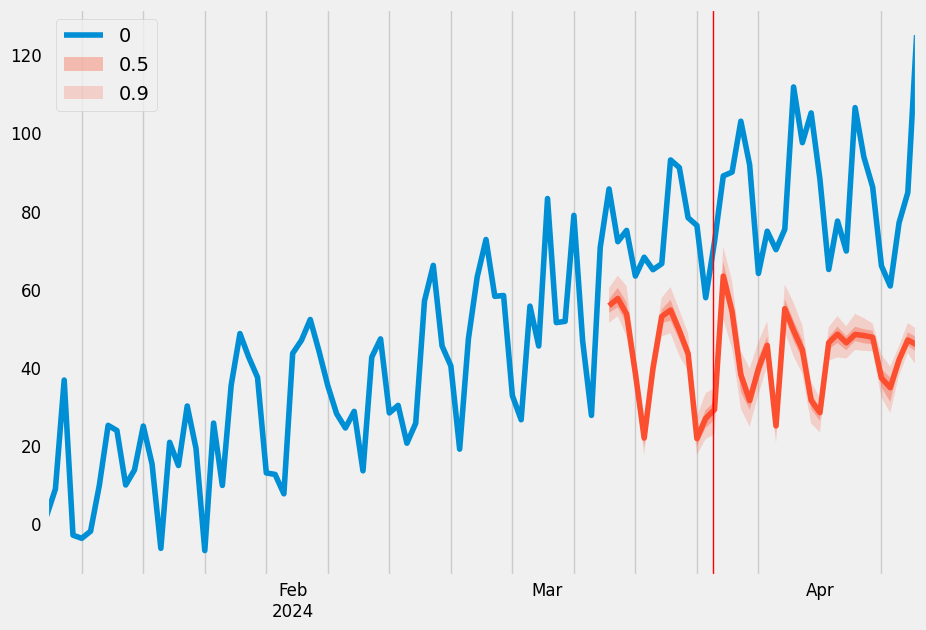

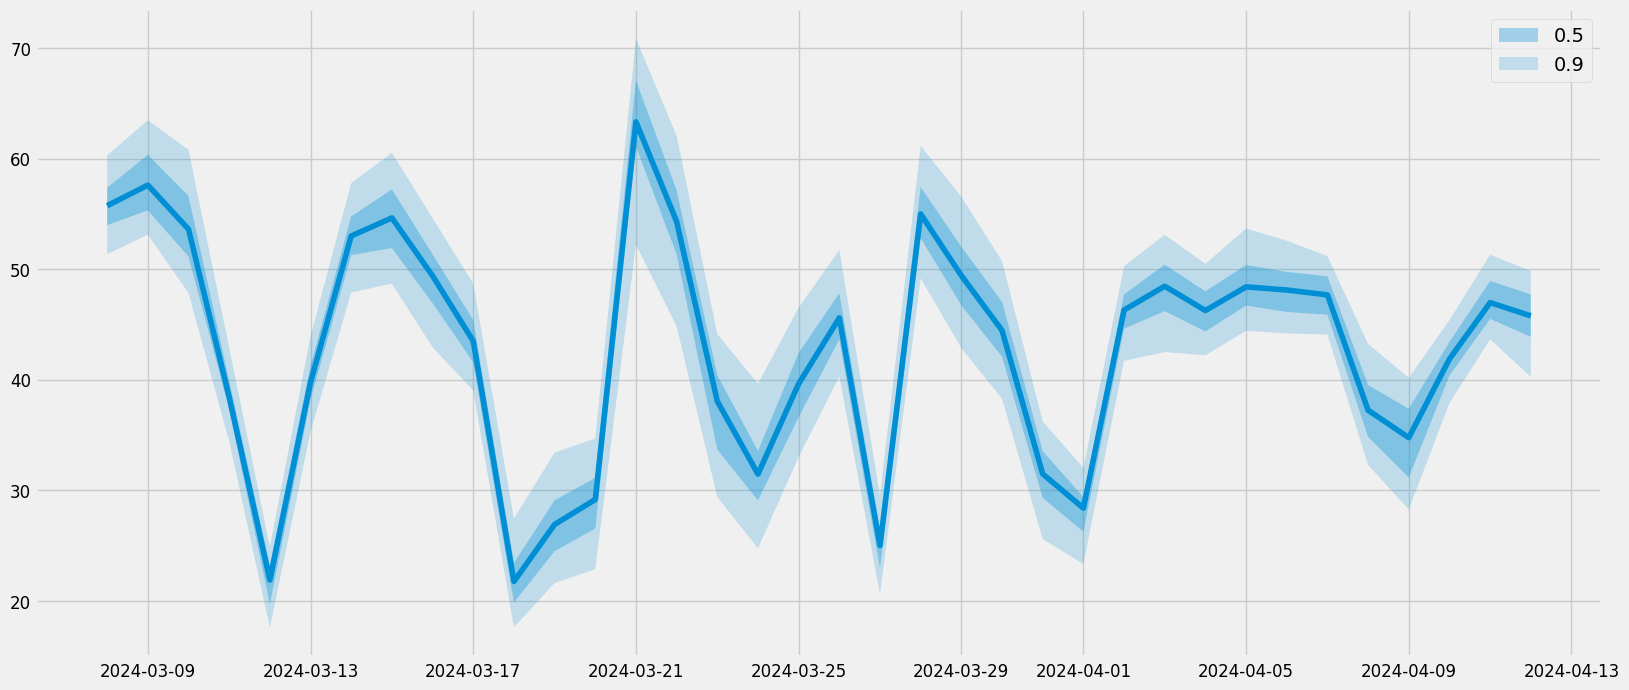

In [43]:

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
tss = list(ts_it)

print(f"Number of sample paths: {forecasts[0].num_samples}")
print(f"Dimension of samples: {forecasts[0].samples.shape}")
print(f"Start date of the forecast window: {forecasts[0].start_date}")
print(f"Frequency of the time series: {forecasts[0].freq}")

plot_prob_forecasts(tss[0], forecasts[0], 100, endTrain)
plt.show()

forecasts[0].plot(show_label=True)
plt.legend()


## Ejemplo sencillo - múltiples series

In [44]:
# Predicción múltiple
ejemplo["entrada"] = np.cos(2*np.pi*np.arange(100)/14)
display(ejemplo)


variable   entrada
fecha                                           
2024-01-04 19:39:45.914203    1.936888  1.000000
2024-01-05 19:39:45.914203    8.814044  0.900969
2024-01-06 19:39:45.914203   36.709572  0.623490
2024-01-07 19:39:45.914203   -3.006491  0.222521
2024-01-08 19:39:45.914203   -3.800881 -0.222521
...                                ...       ...
2024-04-08 19:39:45.914203   65.937423  0.222521
2024-04-09 19:39:45.914203   60.787673  0.623490
2024-04-10 19:39:45.914203   76.941772  0.900969
2024-04-11 19:39:45.914203   84.717660  1.000000
2024-04-12 19:39:45.914203  125.009821  0.900969

[100 rows x 2 columns]

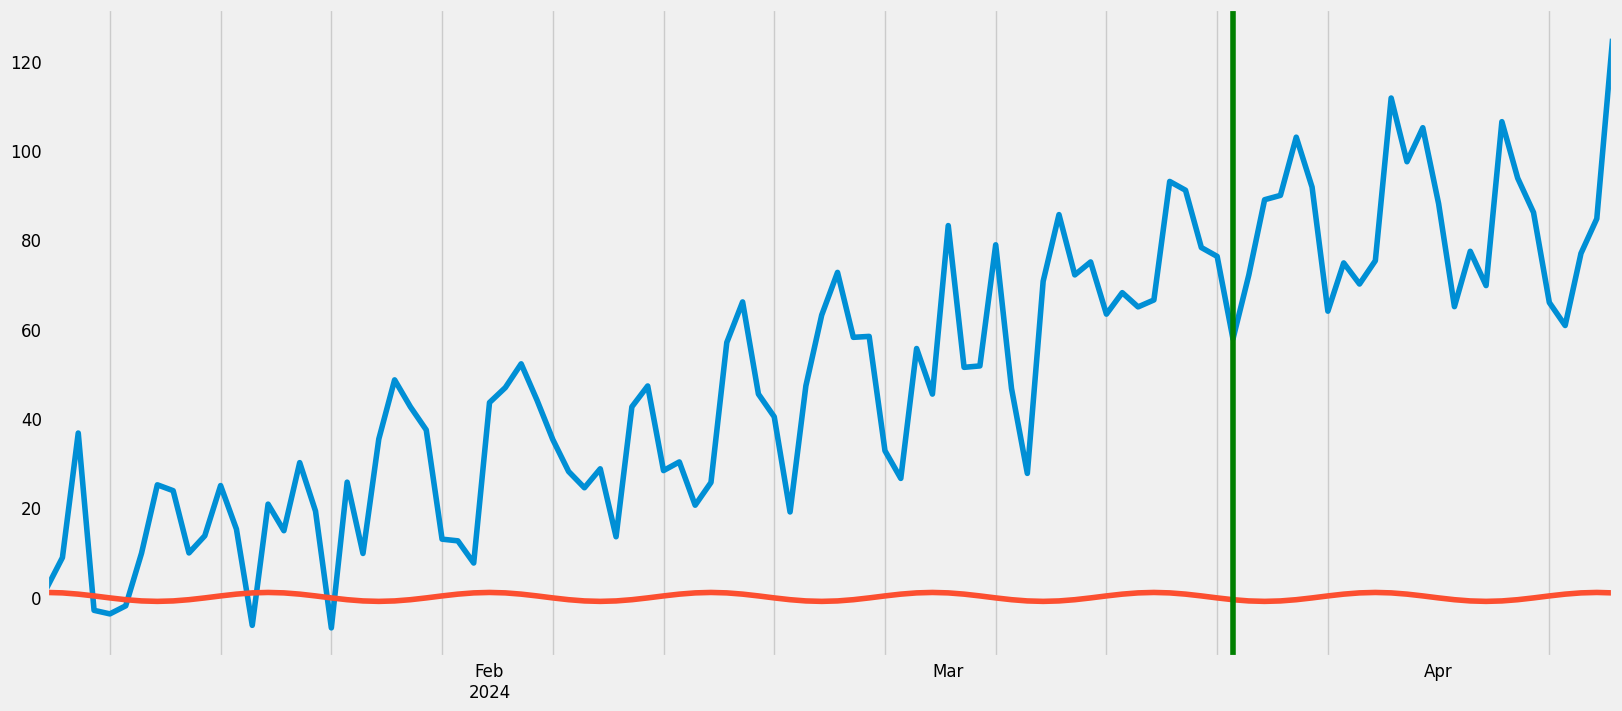

In [45]:
# Una variable "target", una fecha "start" y una frecuencia
training_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:endTrain,"variable"]},
     {"start": ejemplo.index[0], "target": ejemplo.loc[:endTrain,"entrada"]}],
    freq="D"
)
# Train + test
test_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:,"variable"]},
     {"start": ejemplo.index[0], "target": ejemplo.loc[:,"entrada"]}],
    freq="D"
)

to_pandas(test_data[0]).plot()
to_pandas(test_data[1]).plot()
plt.axvline(endTrain, color='g')
plt.grid(which="both")
plt.show()


In [46]:
estimator = DeepAREstimator(freq="D",
                            prediction_length=25,
                            trainer_kwargs={"max_epochs": 100, "accelerator": "cpu"})

predictor = estimator.train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | [[1, 1], [1, 1], [1, 1117, 4], [1, 1117], [1, 1117], [1, 25, 4]] | [1, 100, 25]
------------------------------------------------------------------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 2.62296 (best 2.62296), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_33/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 1.92133 (best 1.92133), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_33/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 1.36221 (best 1.36221), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_33/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 1.05478 (best 1.05478), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_33/checkpoints/epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 0.95092 (best 0.95092), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_33/checkpoints/epoch=4-step=250.ckpt' as top 1
Epoch 5, global step 300: 'train_loss' was not 

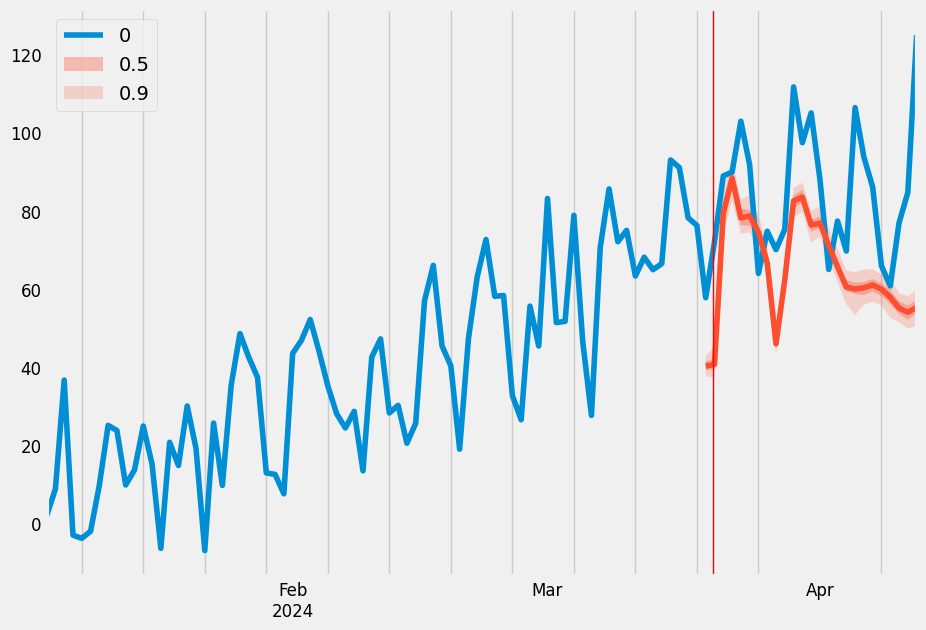

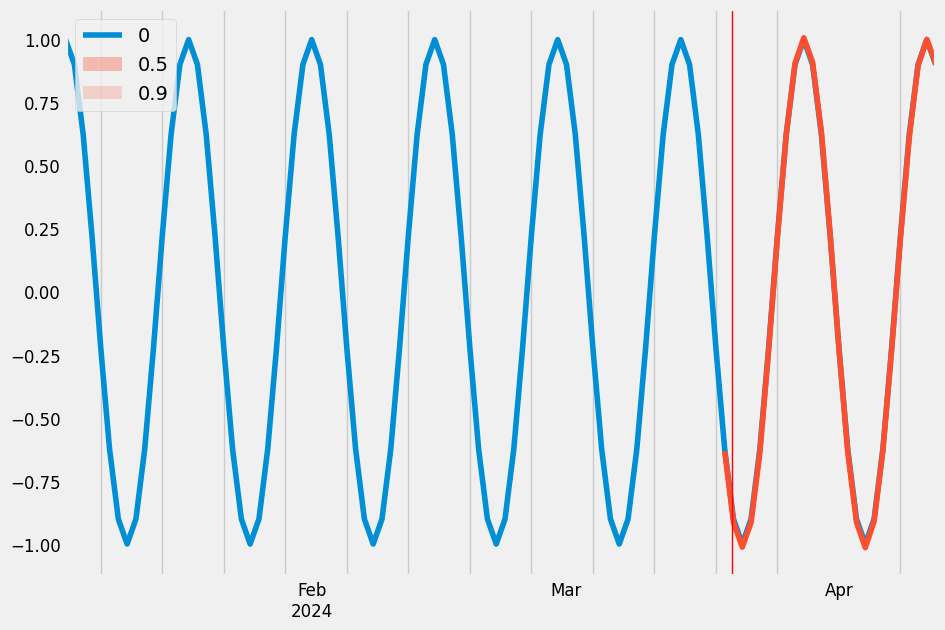

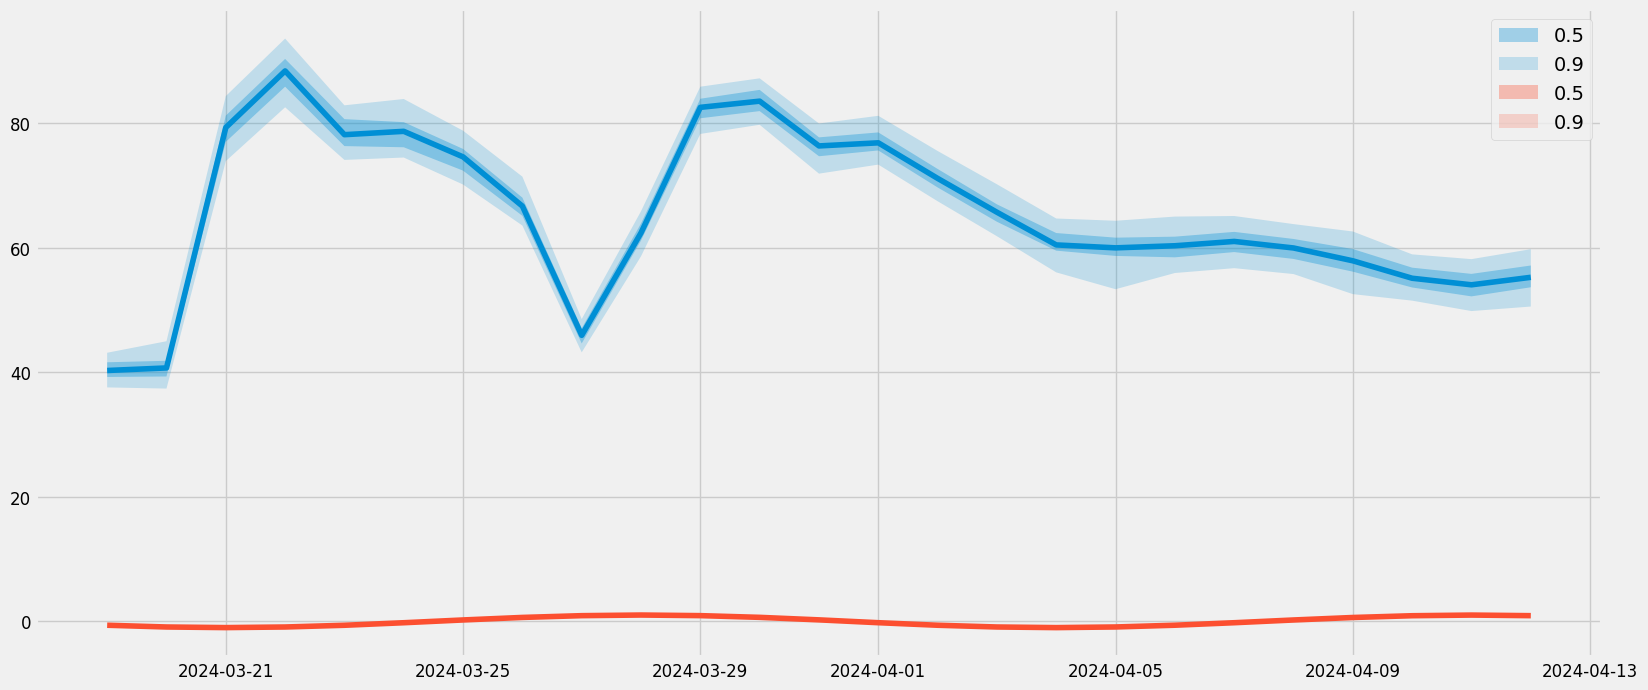

In [47]:

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
tss = list(ts_it)

plot_prob_forecasts(tss[0], forecasts[0], 100, endTrain)
plot_prob_forecasts(tss[1], forecasts[1], 100, endTrain)
plt.show()

forecasts[0].plot(show_label=True)
forecasts[1].plot(show_label=True)
plt.legend()

# DeepAR - ventas

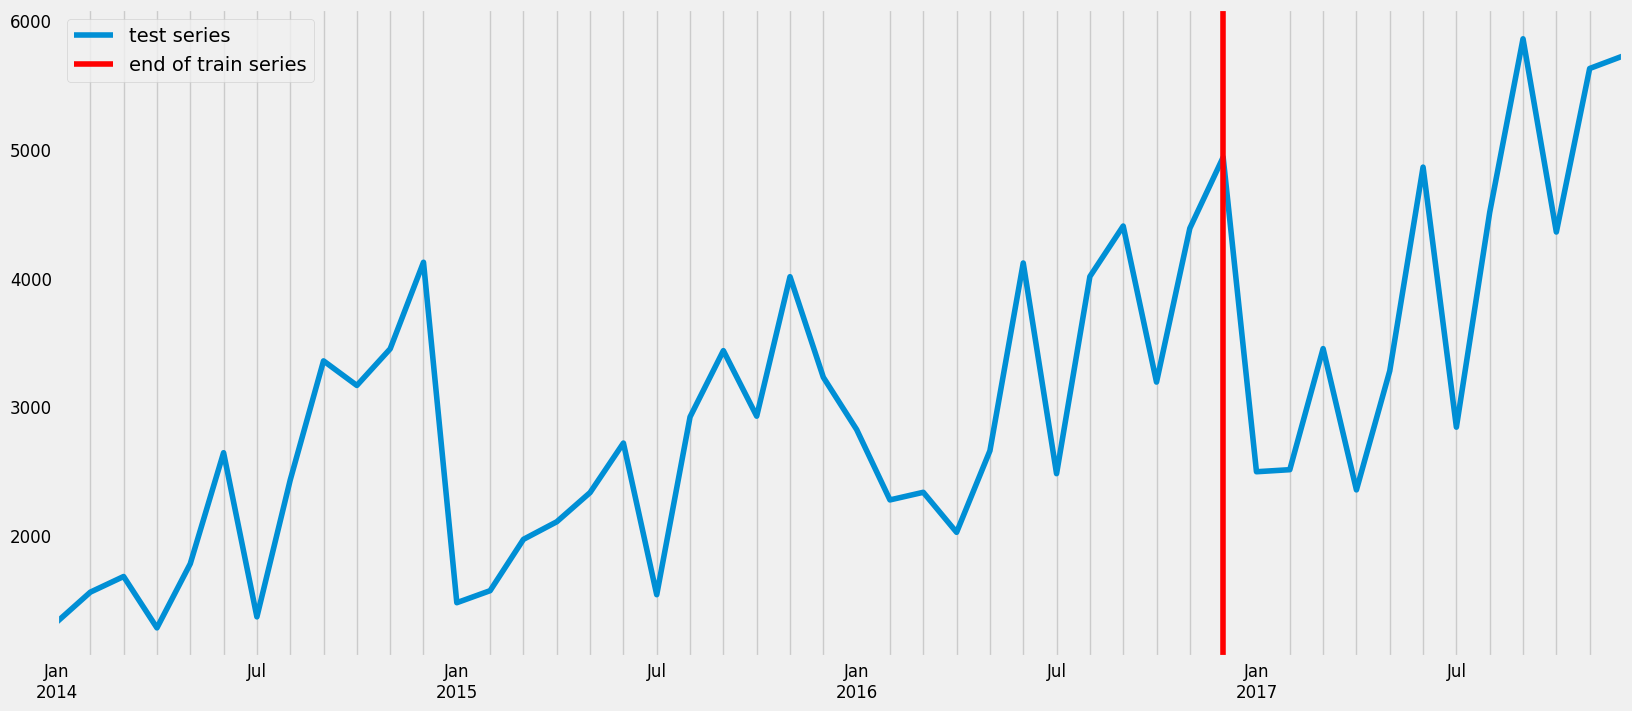

In [48]:


furniture_da = df.loc[df['Category'] == 'Furniture']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture_da.drop(cols, axis=1, inplace=True)
furniture_da = furniture_da.sort_values('Order Date')
furniture_da = furniture_da.groupby('Order Date')['Sales'].sum().reset_index()
furniture_da = furniture_da.set_index('Order Date')
df_furniture = pd.DataFrame(furniture_da['Sales'].resample('M').mean())

# Entrenamiento
steps = 12
endTrain = df_furniture.index[-steps-1]

training_data = ListDataset(
    [{"start": df_furniture.index[0], "target": df_furniture.Sales[:endTrain], }],
    freq="M"
)

# Train
entry = next(iter(training_data))
train_series = to_pandas(entry)

# Test (en realidad, train + test)
test_data = ListDataset(
    [{"start": df_furniture.index[0], "target": df_furniture.Sales}],
    freq="M"
)

entry = next(iter(test_data))
test_series = to_pandas(entry)

test_series.plot()
plt.axvline(endTrain, color='r')  # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()


In [49]:

# context_length — The number of time-points that the model gets to see before making the prediction.
# prediction_length — The number of time-steps that the model is trained to predict, also called the forecast horizon.
# freq — The granularity of the time series in the dataset.
# num_layers — The number of hidden layers in the RNN.


estimator = DeepAREstimator(freq="M",
                            context_length=24,
                            prediction_length=steps,
                            trainer_kwargs={"max_epochs": 100, "accelerator": "cpu"})
                            # trainer_kwargs={"max_epochs": 100, "accelerator": "mps"})

predictor = estimator.train(training_data)

# Estimación en la última ventana del conjunto de test
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 60, 2], [1, 60], [1, 60], [1, 12, 2]] | [1, 100, 12]
------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 5.97608 (best 5.97608), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_34/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 5.51861 (best 5.51861), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_34/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 5.50502 (best 5.50502), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_34/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 5.29235 (best 5.29235), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_34/checkpoints/epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 5.20864 (best 5.20864), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_34/checkpoints/epoch=4-step=250.ckpt' as top 1
Epoch 5, global step 300: 'train_loss' reached 

In [50]:
forecasts = list(forecast_it)
tss = list(ts_it)

Number of sample paths: 100
Dimension of samples: (100, 12)
Start date of the forecast window: 2017-01
Frequency of the time series: <MonthEnd>


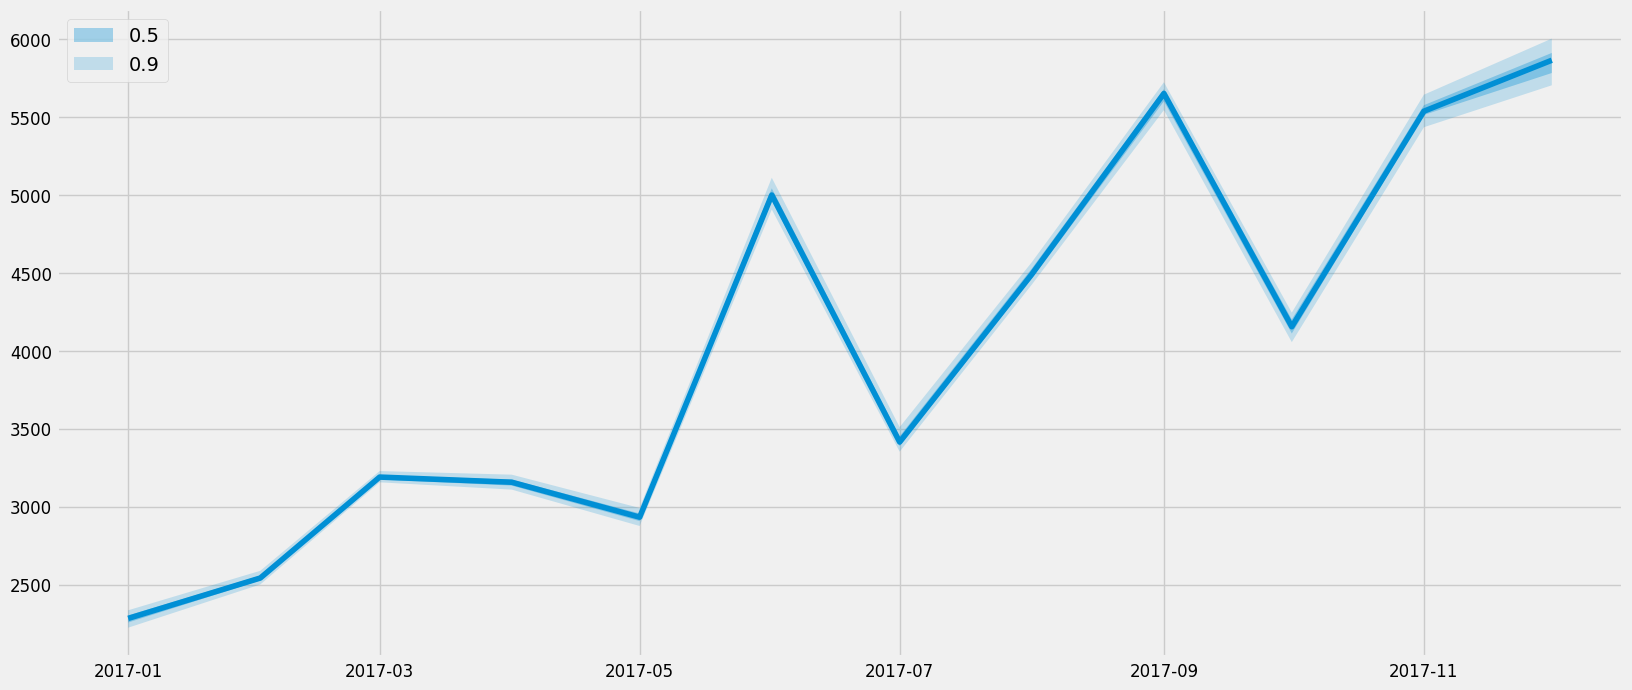

In [51]:
forecast_entry = forecasts[0]
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")
forecast_entry.plot(show_label=True)
plt.legend()

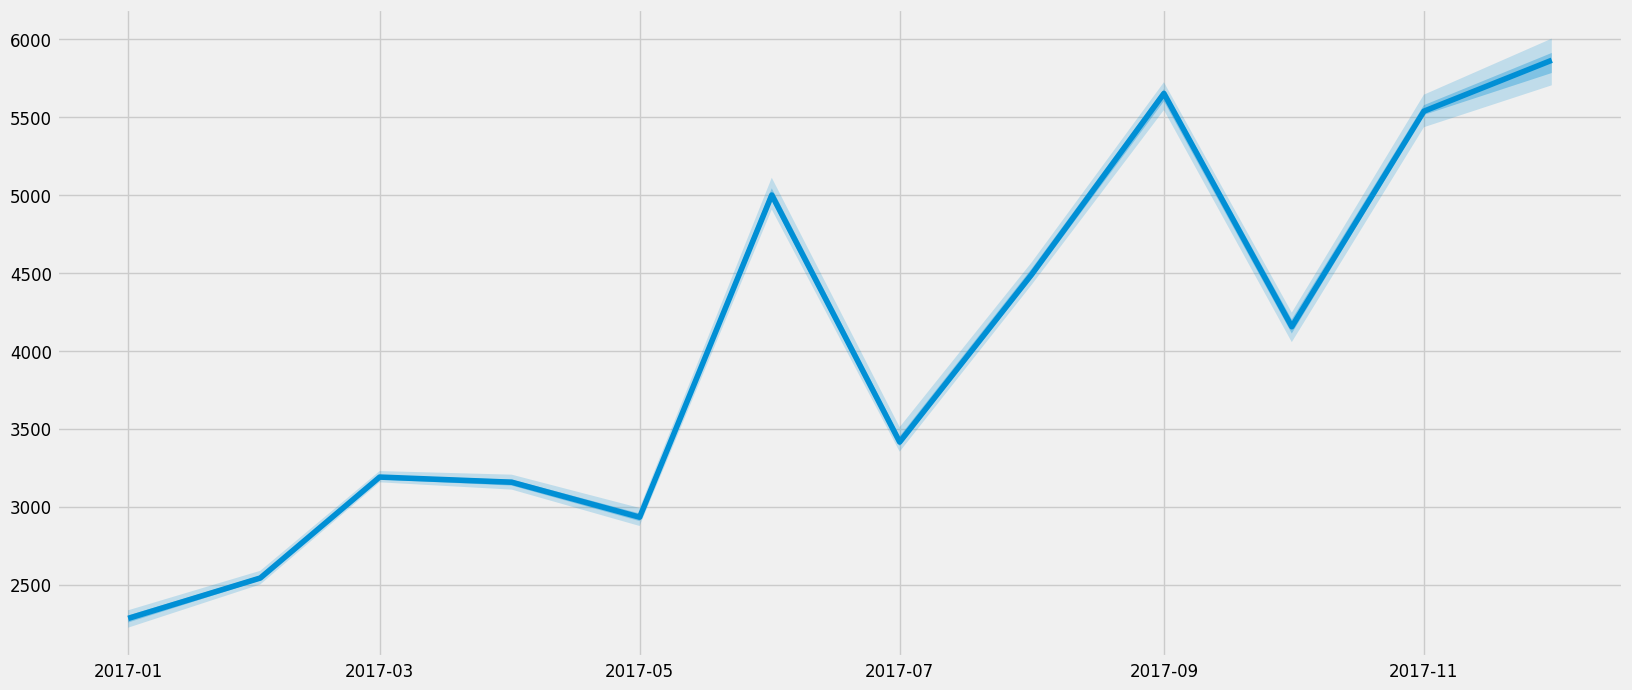

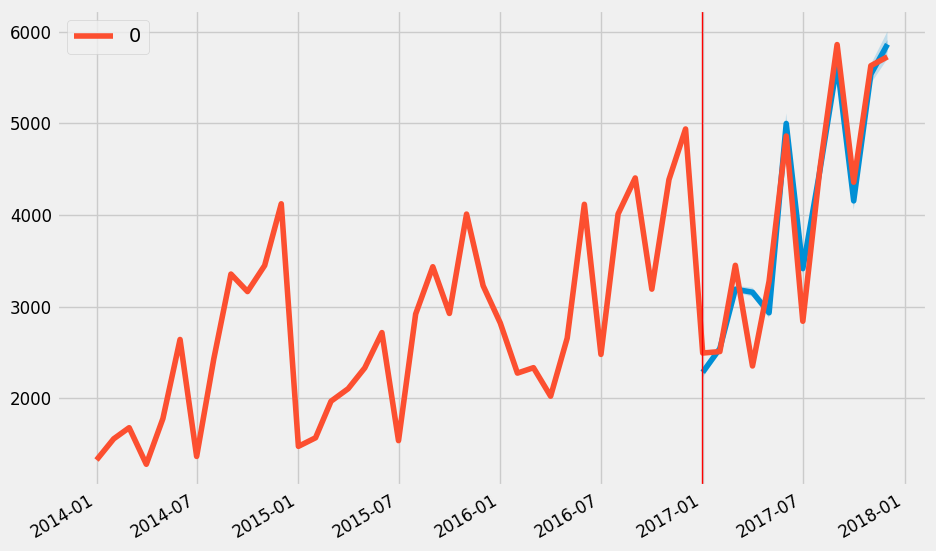

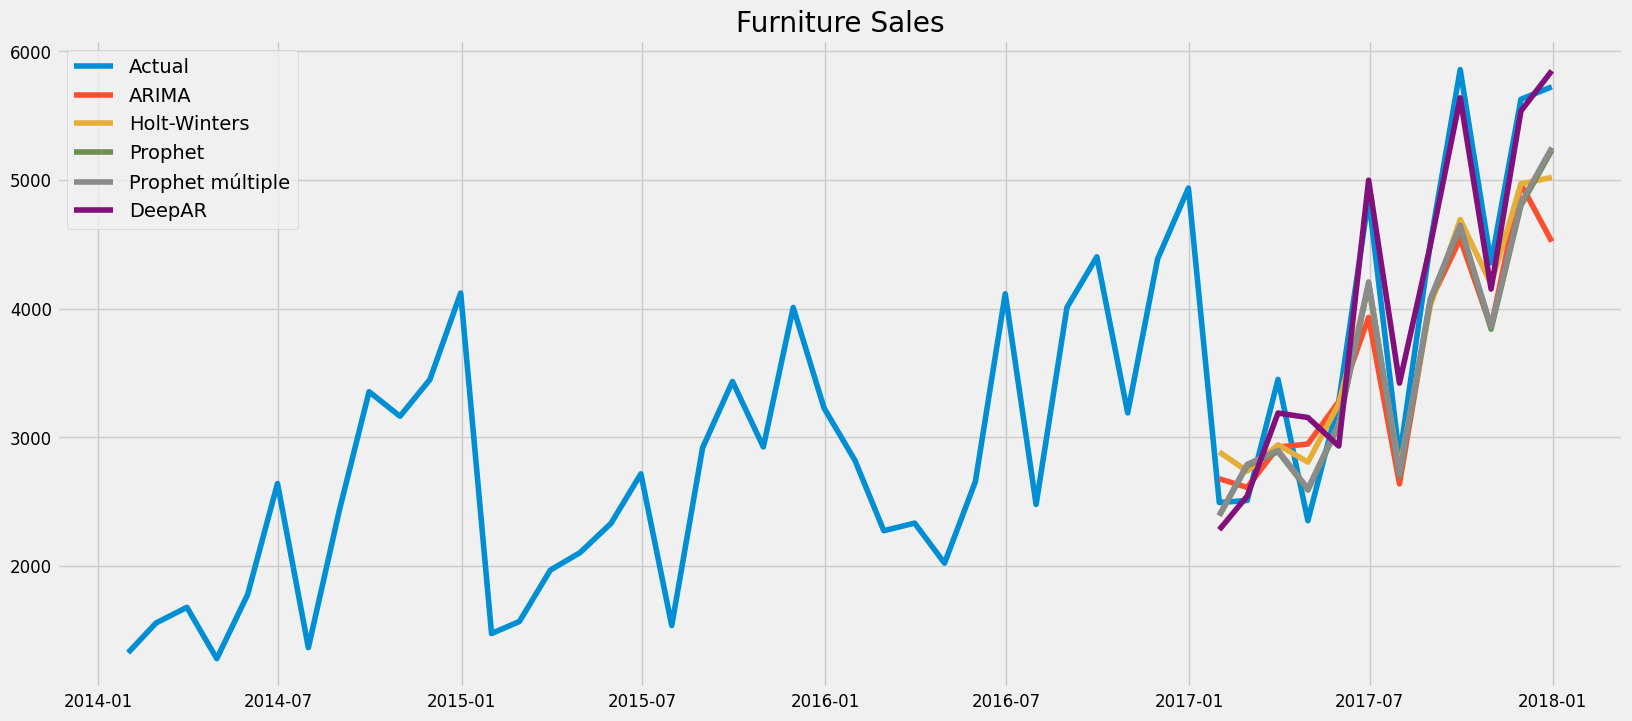

Error cuadrático medio DEEPAR 112332.75
Raíz cuadrada de ECM DEEPAR 335.16
Error porcentual medio DEEPAR 8.16


In [52]:
forecasts[0].plot(show_label=True)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
forecasts[0].plot(ax=ax)
tss[0].plot(ax=ax)
plt.axvline(endTrain, lw=1, color='r')
plt.show()

plt.plot(furniture, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.plot(forecasts[0].mean_ts, label="DeepAR")
plt.legend()
plt.title('Furniture Sales')
plt.show()

predicciones_deepar = forecast_entry.mean_ts[endTrain:]
mse = ((predicciones_deepar.values - y_truth.values) ** 2).mean()
rele = (np.abs(predicciones_deepar.values -
        y_truth.values)/y_truth.values*100).mean()
print('Error cuadrático medio DEEPAR {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM DEEPAR {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio DEEPAR {}'.format(round((rele), 2)))

## DeepAR - ventas + múltiples series

In [53]:

# -----------------------------------------------------------------------------
# DeepAR múltiple: el mismo modelo se usa para varias series
# -----------------------------------------------------------------------------

office_da = df.loc[df['Category'] == 'Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office_da.drop(cols, axis=1, inplace=True)
office_da = office_da.sort_values('Order Date')
office_da = office_da.groupby('Order Date')['Sales'].sum().reset_index()
office_da = office_da.set_index('Order Date')
df_office = pd.DataFrame(office_da['Sales'].resample('M').mean())


training_data2 = ListDataset(
    data_iter=[
        {"start": df_furniture.index[0],
            "target": df_furniture.Sales[:endTrain].values},
        {"start": df_office.index[0],
            "target": df_office.Sales[:endTrain].values}
    ],
    freq="M"
)

test_data2 = ListDataset(
    data_iter=[
        {"start": df_furniture.index[0], "target": df_furniture.Sales.values},
        {"start": df_office.index[0], "target": df_office.Sales.values}
    ],
    freq="M"
)
# num_layers: The number of layers in the LSTM neural network.
# context_length: The number of past time steps the model should consider when making a prediction.
# hidden_size: The number of hidden units (neurons) in each LSTM layer.
# dropout_rate: The dropout rate applied to the LSTM layers to prevent overfitting.
# lr: The learning rate for the model’s optimizer.
# batch_size: The number of samples used for each update of the model’s weights during training.

estimator2 = DeepAREstimator(freq="M",
                             num_layers = 2,
                             hidden_size = 40,
                             dropout_rate=0.01,
                             context_length=24,
                             batch_size=256,
                             prediction_length=steps,
                             trainer_kwargs={"max_epochs": 200, "accelerator":"cpu"})
                             # {"max_epochs":100, "accelerator":"mps"}

predictor2 = estimator2.train(training_data2)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 60, 2], [1, 60], [1, 60], [1, 12, 2]] | [1, 100, 12]
------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 5.85425 (best 5.85425), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_35/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 5.53882 (best 5.53882), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_35/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 5.40679 (best 5.40679), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_35/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 5.17992 (best 5.17992), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_35/checkpoints/epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 5.02891 (best 5.02891), saving model to '/home/mier/uo/y4t1/Negocio/PL/p7/lightning_logs/version_35/checkpoints/epoch=4-step=250.ckpt' as top 1
Epoch 5, global step 300: 'train_loss' reached 

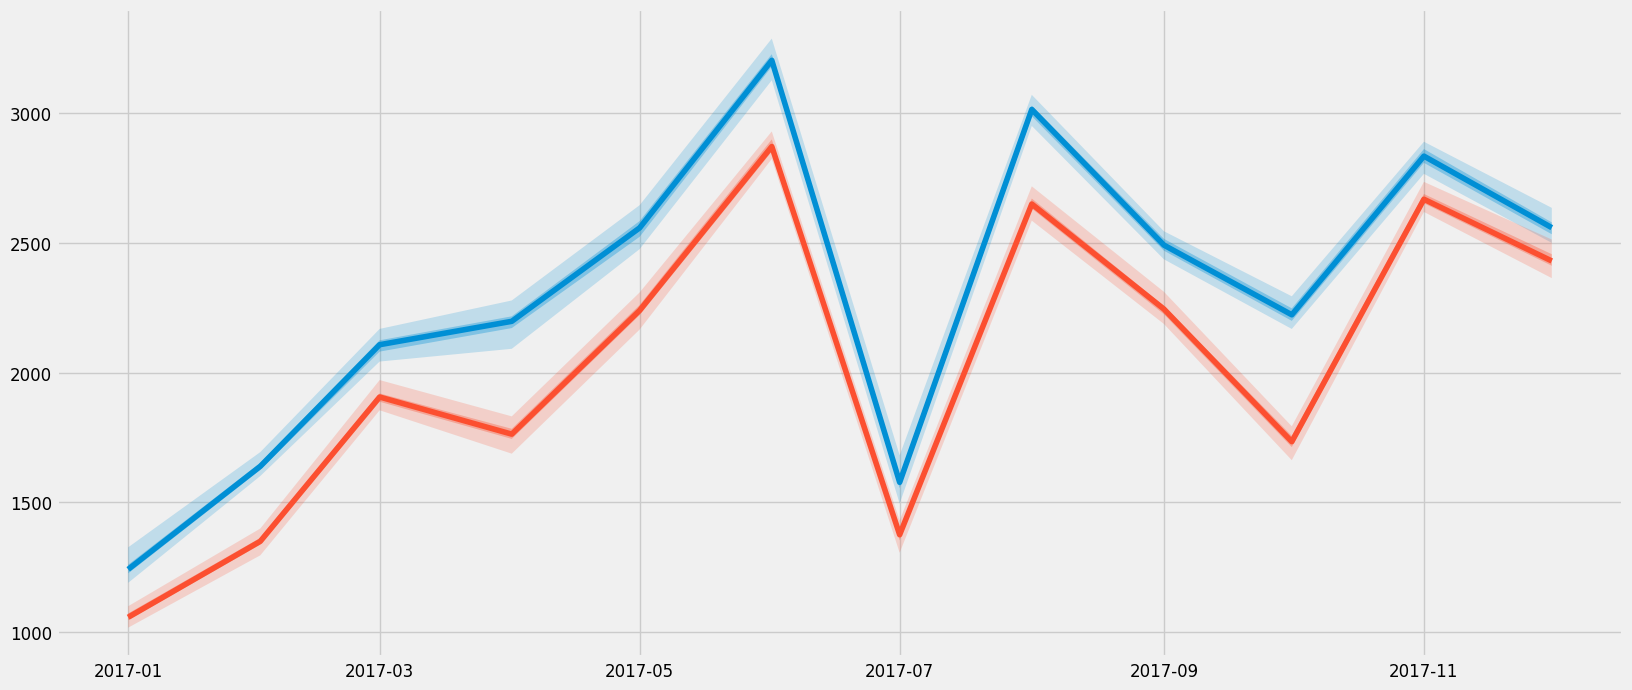

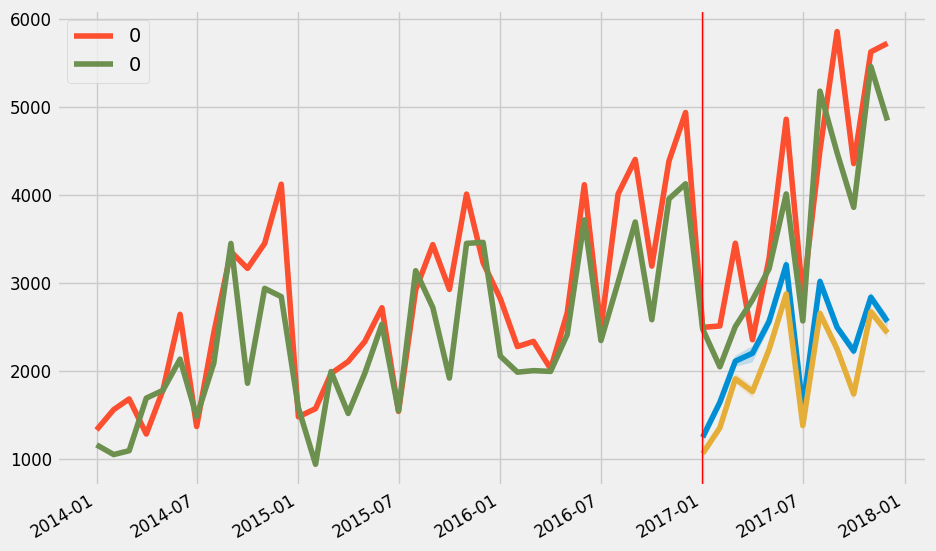

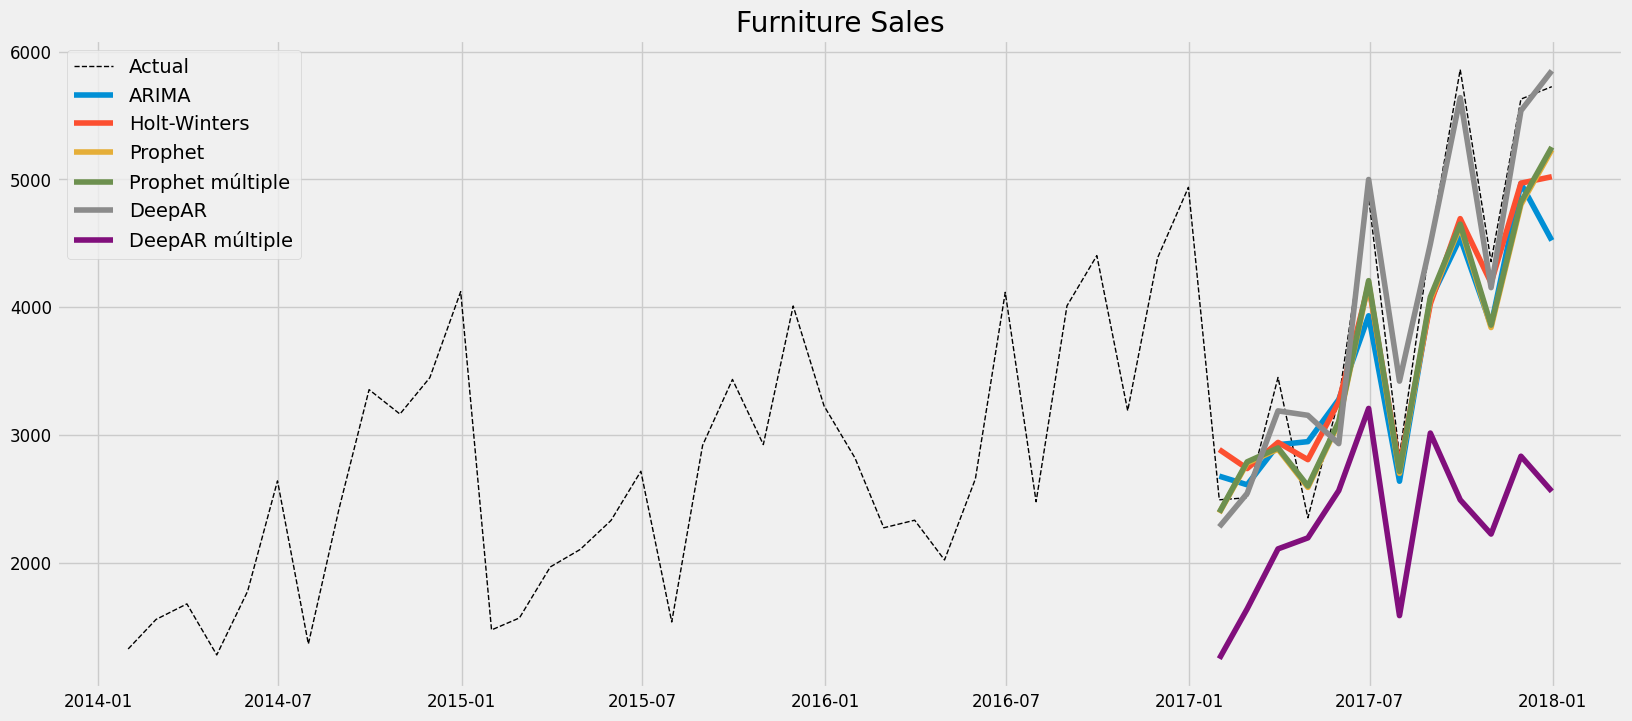

In [54]:
# Estimación en la última ventana del conjunto de test
forecast_it2, ts_it2 = make_evaluation_predictions(
    dataset=test_data2,  # test dataset
    predictor=predictor2,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts2 = list(forecast_it2)
tss2 = list(ts_it2)

forecasts2[0].plot(show_label=True)
forecasts2[1].plot(show_label=True)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
forecasts2[0].plot(ax=ax)
tss2[0].plot(ax=ax)
forecasts2[1].plot(ax=ax)
tss2[1].plot(ax=ax)
plt.axvline(endTrain, lw=1, color='r')
plt.show()

plt.plot(furniture, label="Actual", c="black", lw=1, ls="dashed")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.plot(forecasts[0].mean_ts, label="DeepAR")
plt.plot(forecasts2[0].mean_ts, label="DeepAR múltiple")
plt.legend()
plt.title('Furniture Sales')
plt.show()

In [55]:
predicciones_deepar2 = forecasts2[0].mean_ts['2017-01-31':'2017-12-31']
mse = ((predicciones_deepar2.values - y_truth.values) ** 2).mean()
rele = (np.abs(predicciones_deepar2.values -
        y_truth.values)/y_truth.values*100).mean()
print('Error cuadrático medio DEEPAR 2 {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM DEEPAR 2 {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio DEEPAR 2 {}'.format(round(rele, 2)))


Error cuadrático medio DEEPAR 2 3740932.3
Raíz cuadrada de ECM DEEPAR 2 1934.15
Error porcentual medio DEEPAR 2 39.54


# Predicciones recursivas

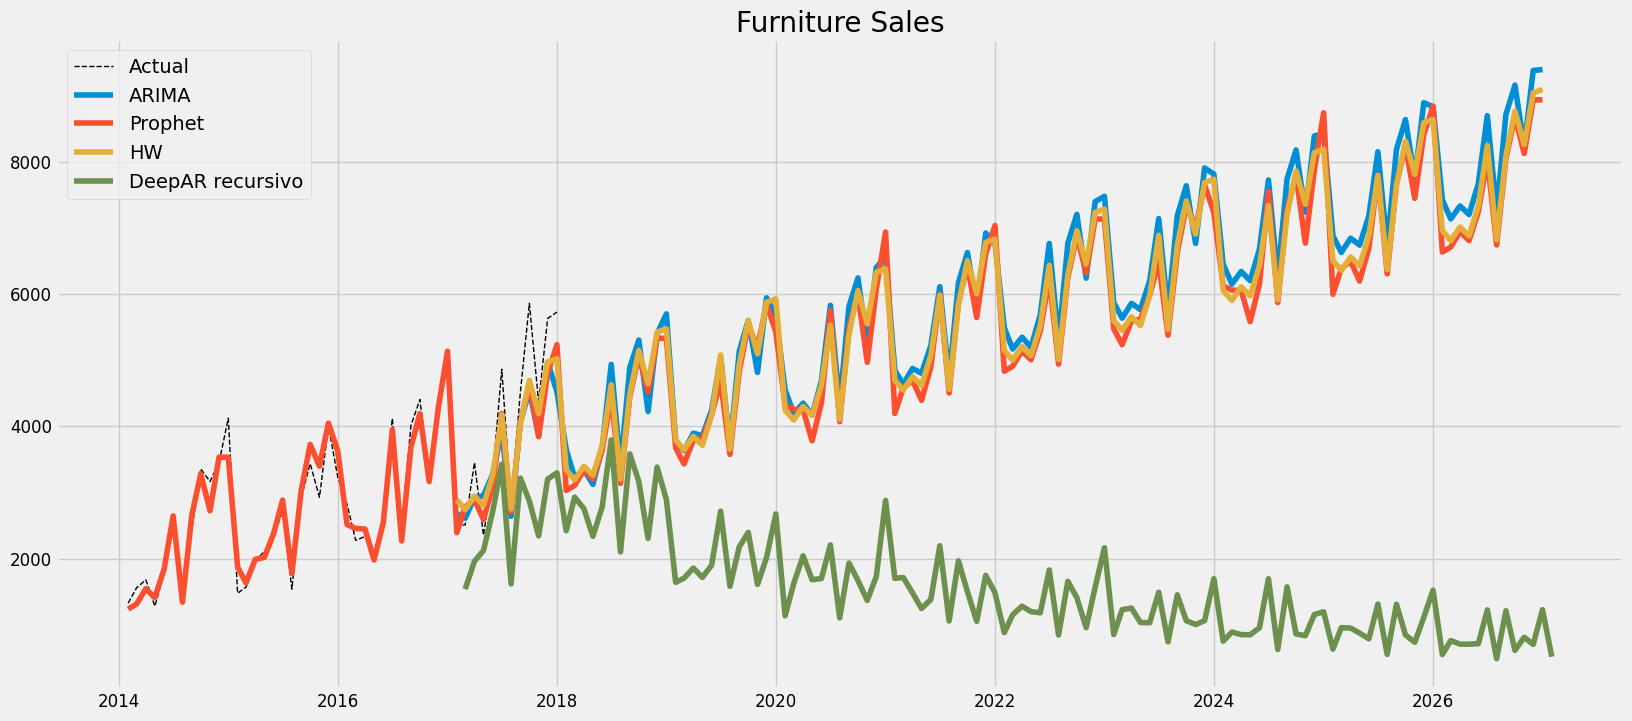

In [56]:

# -----------------------------------------------------------------------------
# Estimaciones recurrentes con DeepAR
# -----------------------------------------------------------------------------


frag = 12
hsteps = steps//frag
NCICLOS = 10
nuevosdatos = np.zeros(hsteps)
for repeticion in range(NCICLOS*frag):
    #
    # Se le alimenta como entrada la última predicción
    #
    test_data3 = ListDataset(
        data_iter=[
            {"start": df_furniture.index[0],
             "target": np.concatenate((df_furniture.Sales.values, nuevosdatos))},
        ],
        freq="M"
    )

    forecast_it3, ts_it3 = make_evaluation_predictions(
        dataset=test_data3,  # train dataset
        predictor=predictor2,  # predictor (el modelo de 2 series)
        num_samples=100,  # number of sample paths we want for evaluation
    )

    forecasts3 = list(forecast_it3)
    tss3 = list(ts_it3)
    ts_entry3 = tss2[0]
    forecast_entry3 = forecasts3[0]

    if repeticion == 0:
        forecast = forecast_entry3.mean_ts[:-(steps-hsteps)]
    else:
        forecast = pd.concat(
            (forecast, forecast_entry3.mean_ts[:-(steps-hsteps)]))

    nuevosdatos = np.concatenate(
        (nuevosdatos, forecast_entry3.mean_ts[:-(steps-hsteps)]))

#
# Comparativa de predicciones a largo plazo
#
furniture_forecast2 = furniture_model.make_future_dataframe(
    periods=NCICLOS*steps, freq='M')
furniture_forecast2 = furniture_model.predict(furniture_forecast2)
plt.plot(furniture, label="Actual", c="black", lw=1, ls="dashed")
plt.plot(results.get_forecast(steps=NCICLOS *
         steps).predicted_mean, label="ARIMA")
plt.plot(furniture_forecast2.set_index("ds")["yhat"], label="Prophet")
plt.plot(hw_model.forecast(NCICLOS*steps), label="HW")
plt.plot(forecast, label="DeepAR recursivo")
plt.legend()
plt.title('Furniture Sales')
plt.show()
